In [12]:
!pip install seaborn
!pip install scipy
!pip install plotly

  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
   ---------------------------------------- 0.0/19.0 MB ? eta -:--:--
   -- ------------------------------------- 1.3/19.0 MB 11.2 MB/s eta 0:00:02
   --------- ------------------------------ 4.5/19.0 MB 16.8 MB/s eta 0:00:01
   ------------------ --------------------- 8.9/19.0 MB 15.8 MB/s eta 0:00:01
   ------------------------- -------------- 12.1/19.0 MB 16.8 MB/s eta 0:00:01
   -------------------------------- ------- 15.2/19.0 MB 15.4 MB/s eta 0:00:01
   ---------------------------------- ----- 16.5/19.0 MB 13.9 MB/s eta 0:00:01
   -------------------------------------- - 18.1/19.0 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 19.0/19.0 MB 11.8 MB/s eta 0:00:00
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


In [1]:
import pandas as pd
df=pd.read_csv("finalized.csv")

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

In [12]:
df

,Unnamed: 0,bt,km,transmission,ownerNo,model,modelYear,centralVariantId,variantName,price,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,City,RPM_BHP,Power_RTO
0,0,2.0,120000,1,3,160,2015,3979,1806,400000.0,...,7.0,174.018972,15.050000,23.0,5.0,235.0,15.664024,0,3567.040000,6165.000000
1,1,7.0,32706,1,2,50,2018,6087,288,811000.0,...,7.0,174.018972,12.795906,26.0,4.0,352.0,16.000000,0,4621.310000,6635.000000
2,2,2.0,11949,1,1,273,2018,2983,129,585000.0,...,7.0,150.000000,14.300000,13.0,5.0,242.0,14.000000,0,3601.893989,6133.000000
3,3,8.0,17794,1,1,87,2014,1867,101,462000.0,...,7.0,174.018972,14.200000,26.0,4.0,407.0,14.000000,0,4081.860000,6167.000000
4,4,7.0,60000,1,1,178,2015,4277,987,790000.0,...,21.0,174.018972,12.000000,26.0,5.0,353.0,16.000000,0,1838.500000,4134.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,8362,2.0,70000,1,1,300,2015,1946,113,360000.0,...,7.0,165.000000,14.200000,26.0,5.0,280.0,15.664024,5,4401.893989,5642.030234
5655,8363,2.0,30000,1,1,82,2009,1709,1135,150000.0,...,7.0,174.018972,12.795906,26.0,5.0,218.0,13.000000,5,3101.893989,5742.030234
5656,8365,2.0,120000,1,1,155,2014,3943,1268,180000.0,...,7.0,140.000000,19.000000,19.0,5.0,177.0,15.664024,5,3547.300000,6242.030234
5657,8367,2.0,40000,1,1,175,2012,4144,2069,140000.0,...,7.0,174.018972,15.000000,26.0,5.0,236.0,14.000000,5,4085.800000,6242.030234


In [3]:
df.drop(columns="BoreX Stroke",inplace=True)

In [4]:
df.drop(columns="Unnamed: 0",inplace=True)

In [5]:
df

,bt,km,transmission,ownerNo,model,modelYear,centralVariantId,variantName,price,Insurance Validity,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,City,RPM_BHP,Power_RTO
0,2.0,120000,1,3,160,2015,3979,1806,400000.0,5.0,...,7.0,174.018972,15.050000,23.0,5.0,235.0,15.664024,0,3567.040000,6165.000000
1,7.0,32706,1,2,50,2018,6087,288,811000.0,2.0,...,7.0,174.018972,12.795906,26.0,4.0,352.0,16.000000,0,4621.310000,6635.000000
2,2.0,11949,1,1,273,2018,2983,129,585000.0,2.0,...,7.0,150.000000,14.300000,13.0,5.0,242.0,14.000000,0,3601.893989,6133.000000
3,8.0,17794,1,1,87,2014,1867,101,462000.0,2.0,...,7.0,174.018972,14.200000,26.0,4.0,407.0,14.000000,0,4081.860000,6167.000000
4,7.0,60000,1,1,178,2015,4277,987,790000.0,5.0,...,21.0,174.018972,12.000000,26.0,5.0,353.0,16.000000,0,1838.500000,4134.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,2.0,70000,1,1,300,2015,1946,113,360000.0,5.0,...,7.0,165.000000,14.200000,26.0,5.0,280.0,15.664024,5,4401.893989,5642.030234
5655,2.0,30000,1,1,82,2009,1709,1135,150000.0,5.0,...,7.0,174.018972,12.795906,26.0,5.0,218.0,13.000000,5,3101.893989,5742.030234
5656,2.0,120000,1,1,155,2014,3943,1268,180000.0,5.0,...,7.0,140.000000,19.000000,19.0,5.0,177.0,15.664024,5,3547.300000,6242.030234
5657,2.0,40000,1,1,175,2012,4144,2069,140000.0,5.0,...,7.0,174.018972,15.000000,26.0,5.0,236.0,14.000000,5,4085.800000,6242.030234


In [11]:
df.drop(columns="Comfort & Convenience",inplace=True)
df.drop(columns="Safety",inplace=True)
df['Wheel Base'] = df['Wheel Base'].str.replace('m', '', regex=False)  # Remove 'm'
df['Wheel Base'] = df['Wheel Base'].str.replace(',', '', regex=False)  # Remove commas
df['Wheel Base'] = df['Wheel Base'].astype(float)
df.drop(columns="Gear Box",inplace=True)

z_score analaysis


In [12]:
import pandas as pd
import numpy as np
# Function to calculate Z-scores and identify outliers
def calculate_z_scores(df, threshold=3):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Apply Z-score calculation to each column
    z_scores = (numeric_df - numeric_df.mean()) / numeric_df.std()
    
    # Identify outliers (where Z-score is greater than the threshold or less than -threshold)
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    
    # Mark outliers in the original DataFrame
    df_outliers = df[outliers.any(axis=1)]
    
    return z_scores, df_outliers

# Calculate Z-scores and get outliers
z_scores, outliers = calculate_z_scores(df)

# Display Z-scores and outliers
print("Z-Scores for all columns:")
print(z_scores)

print("\nOutliers in the DataFrame:")
print(outliers)

Z-Scores for all columns:
            bt        km  transmission   ownerNo     model  modelYear  \
0    -1.077924  0.651715      0.591243  2.461894  0.296265  -0.283241   
1     0.735924 -0.388076      0.591243  0.926534 -1.065256   0.675407   
2    -1.077924 -0.635321      0.591243 -0.608826  1.694919   0.675407   
3     1.098693 -0.565699      0.591243 -0.608826 -0.607290  -0.602790   
4     0.735924 -0.062967      0.591243 -0.608826  0.519060  -0.283241   
...        ...       ...           ...       ...       ...        ...   
5654 -1.077924  0.056147      0.591243 -0.608826  2.029111  -0.283241   
5655 -1.077924 -0.420308      0.591243 -0.608826 -0.669177  -2.200535   
5656 -1.077924  0.651715      0.591243 -0.608826  0.234378  -0.602790   
5657 -1.077924 -0.301195      0.591243 -0.608826  0.481927  -1.241888   
5658  0.735924  0.651715      0.591243  0.926534  1.236953   0.355858   

      centralVariantId  variantName     price  Insurance Validity  ...  \
0            -0.013936 

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Step 1: Convert columns with commas to strings and remove commas
df = df.apply(lambda x: x.astype(str).str.replace(',', '')).astype(float)

# Step 2: Initialize StandardScaler
scaler = StandardScaler()

# Step 3: Fit and transform the data
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)




In [14]:
df

,bt,km,transmission,ownerNo,model,modelYear,centralVariantId,variantName,price,Insurance Validity,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,City,RPM_BHP,Power_RTO
0,-1.078019,0.651773,0.591295,2.462112,0.296292,-0.283266,-0.013937,1.113716,-0.450057,0.843128,...,-0.025557,0.054998,0.828760,0.116757,0.708952,-0.051931,0.044451,-1.403199,-0.025743,0.546233
1,0.735989,-0.388110,0.591295,0.926616,-1.065351,0.675466,0.901511,-1.093197,-0.002808,-1.212299,...,-0.025557,0.054998,-0.039068,0.627495,-1.365484,-0.018171,0.345548,-1.403199,1.131131,0.913117
2,-1.078019,-0.635377,0.591295,-0.608880,1.695069,0.675466,-0.446473,-1.324356,-0.248740,-1.212299,...,-0.025557,-2.233104,0.540009,-1.585705,0.708952,-0.049912,-1.446823,-1.403199,0.012503,0.521254
3,1.098791,-0.565749,0.591295,-0.608880,-0.607344,-0.602843,-0.931122,-1.365063,-0.382588,-1.212299,...,-0.025557,0.054998,0.501509,0.627495,-1.365484,-0.002301,-1.446823,-1.403199,0.539180,0.547794
4,0.735989,-0.062973,0.591295,-0.608880,0.519106,-0.283266,0.115477,-0.076970,-0.025660,0.843128,...,3.609558,0.054998,-0.345493,0.627495,0.708952,-0.017883,0.345548,-1.403199,-1.922508,-1.039176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,-1.078019,0.056152,0.591295,-0.608880,2.029290,-0.283266,-0.896814,-1.347617,-0.493584,0.843128,...,-0.025557,-0.804170,0.501509,0.627495,0.708952,-0.038947,0.044451,1.529114,0.890361,0.138000
5655,-1.078019,-0.420345,0.591295,-0.608880,-0.669236,-2.200730,-0.999737,0.138197,-0.722106,0.843128,...,-0.025557,0.054998,-0.039068,0.627495,0.708952,-0.056837,-2.343009,1.529114,-0.536158,0.216061
5656,-1.078019,0.651773,0.591295,-0.608880,0.234399,-0.602843,-0.029571,0.331556,-0.689460,0.843128,...,-0.025557,-3.185726,2.349513,-0.564228,0.708952,-0.068667,0.044451,1.529114,-0.047404,0.606363
5657,-1.078019,-0.301221,0.591295,-0.608880,0.481970,-1.241998,0.057718,1.496073,-0.732988,0.843128,...,-0.025557,0.054998,0.809510,0.627495,0.708952,-0.051643,-1.446823,1.529114,0.543504,0.606363


In [15]:
#Descriptive statistics - it will show for only numerical columns

df.describe() 

,bt,km,transmission,ownerNo,model,modelYear,centralVariantId,variantName,price,Insurance Validity,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,City,RPM_BHP,Power_RTO
count,5.659000e+03,5.659000e+03,5659.000000,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03,...,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03,5.659000e+03
mean,-1.067258e-16,-1.757837e-17,0.000000,-7.282467e-17,1.211652e-16,-2.752270e-15,4.017913e-17,-3.515674e-17,-3.013434e-17,1.104926e-16,...,-3.264554e-17,-2.772360e-15,5.022391e-18,-3.044824e-16,-8.475284e-16,2.511195e-18,-3.515674e-16,8.035825e-17,-4.520152e-17,-5.775749e-17
std,1.000088e+00,1.000088e+00,1.000088,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,...,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00
min,-1.803622e+00,-7.777183e-01,-1.691202,-2.144376e+00,-1.671900e+00,-9.870586e+00,-1.739738e+00,-1.511900e+00,-7.765154e-01,-2.582583e+00,...,-1.583463e+00,-8.901461e+00,-3.271498e+00,-3.798904e+00,-5.514354e+00,-1.058898e-01,-3.239195e+00,-1.403199e+00,-3.350125e+00,-4.077267e+00
25%,-1.078019e+00,-3.012212e-01,-1.691202,-6.088801e-01,-8.177793e-01,-6.028430e-01,-1.054890e+00,-9.645332e-01,-4.647472e-01,-1.212299e+00,...,-2.555675e-02,5.499756e-02,-1.799422e-01,-5.642280e-01,-1.365484e+00,-3.894677e-02,-5.506375e-01,-8.167363e-01,-7.838170e-01,-9.275491e-01
50%,7.359890e-01,-6.297264e-02,0.591295,-6.088801e-01,-4.340438e-01,3.631176e-02,2.565581e-03,-1.736323e-02,-2.672396e-01,8.431277e-01,...,-2.555675e-02,5.499756e-02,-3.906820e-02,6.274949e-01,7.089517e-01,-4.321056e-03,4.445120e-02,-2.302738e-01,1.222353e-01,3.331280e-01
75%,1.098791e+00,2.151349e-01,0.591295,9.266157e-01,5.809985e-01,6.754665e-01,8.472269e-01,1.011948e+00,8.618172e-03,8.431277e-01,...,-2.555675e-02,5.499756e-02,3.282587e-01,6.274949e-01,7.089517e-01,2.892636e-03,3.455483e-01,9.426512e-01,7.585791e-01,6.422475e-01
max,1.098791e+00,6.474063e+01,0.591295,5.533103e+00,2.202590e+00,2.273353e+00,2.976034e+00,1.621103e+00,9.561349e+00,1.528270e+00,...,6.465720e+00,7.293121e+00,6.700021e+00,1.819218e+00,2.783387e+00,7.517677e+01,4.826477e+00,1.529114e+00,2.001582e+00,4.362080e+01


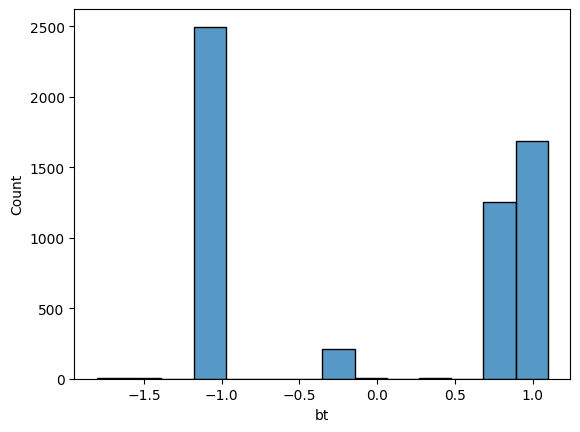

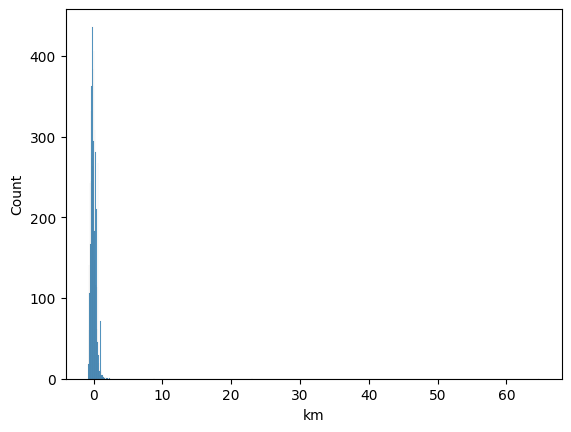

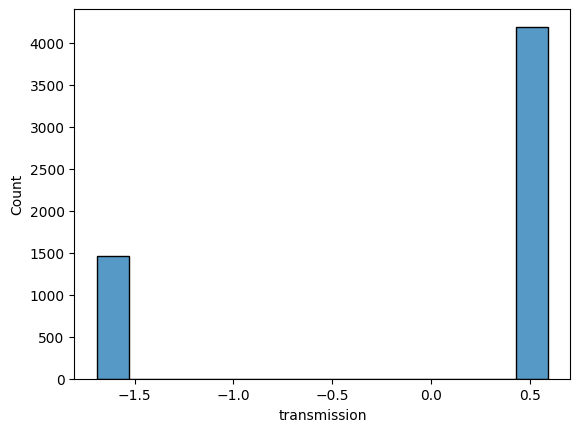

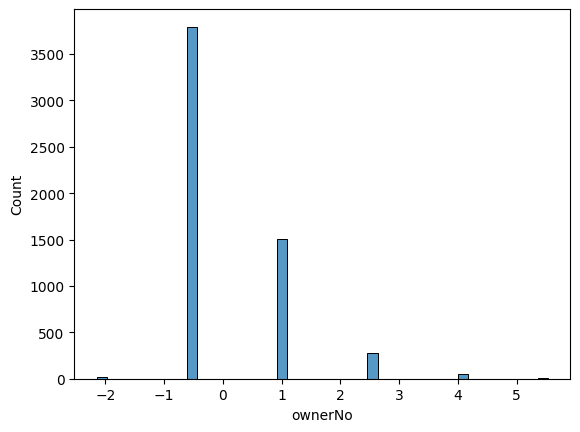

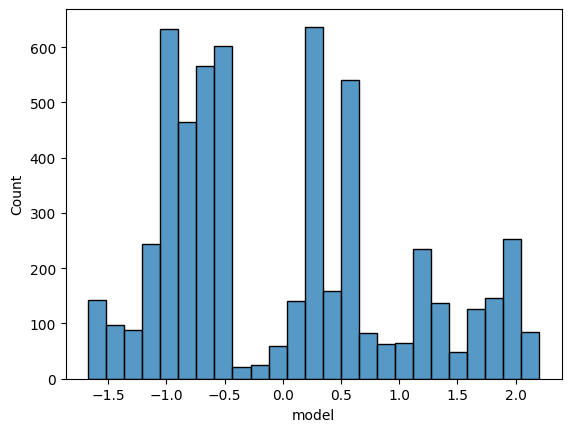

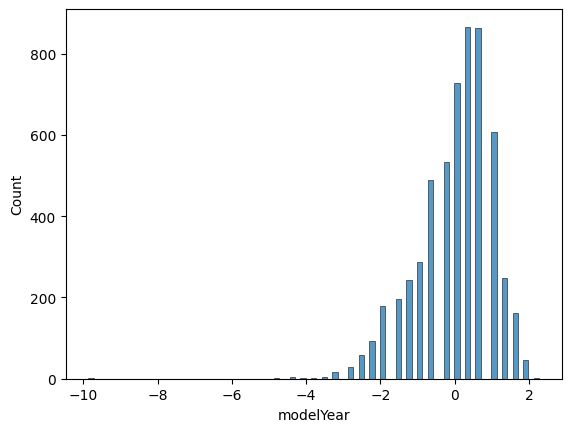

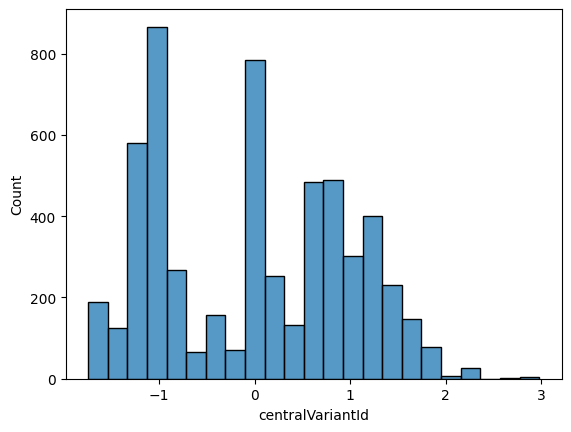

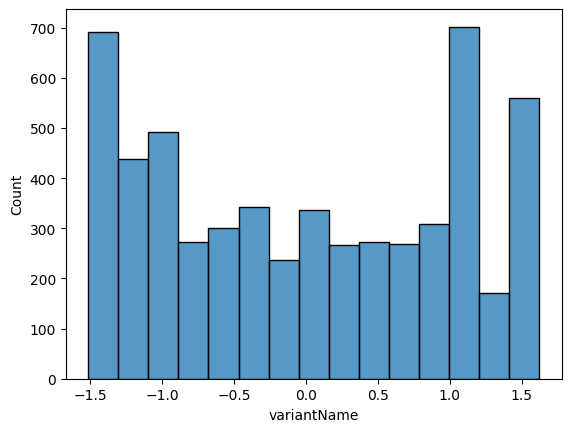

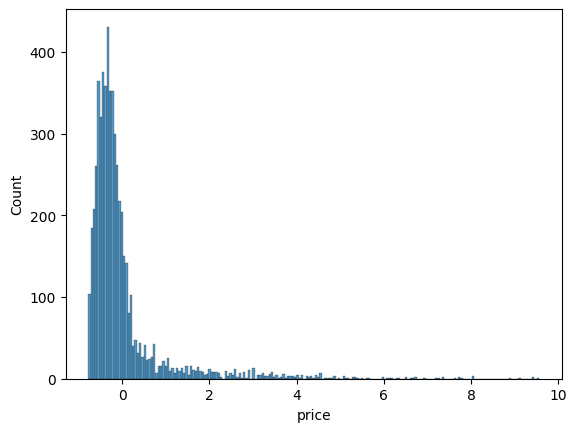

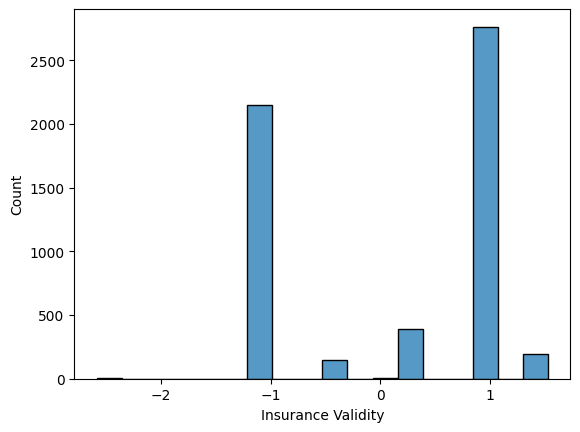

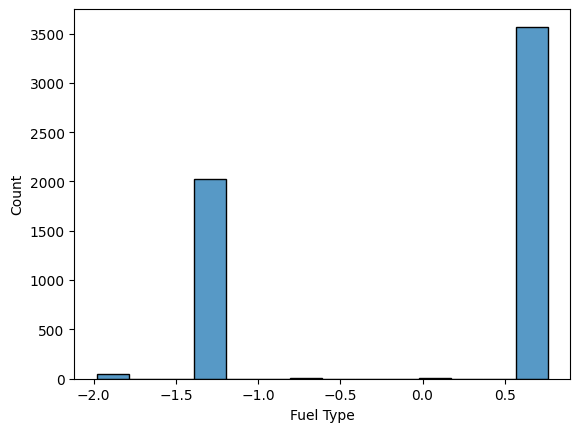

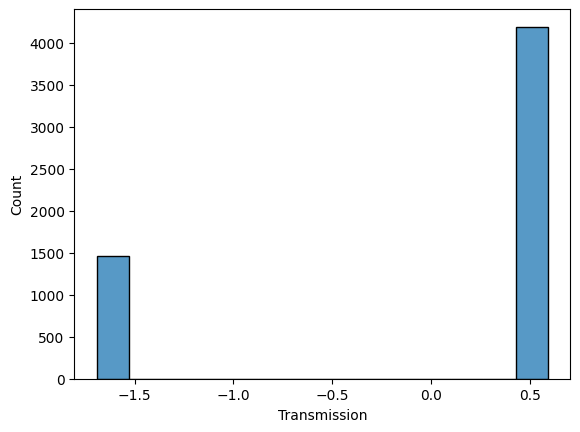

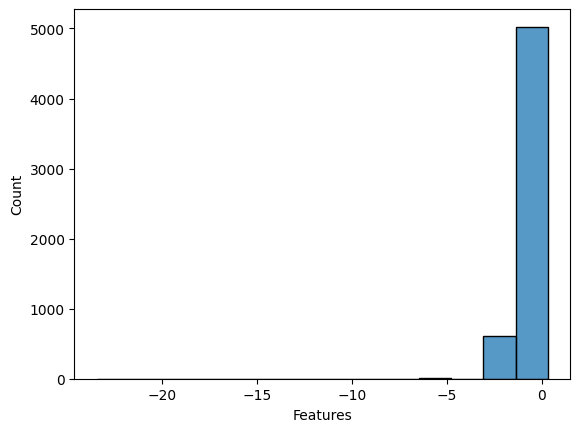

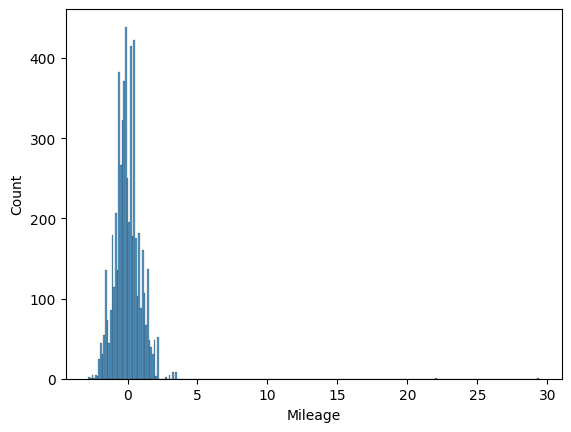

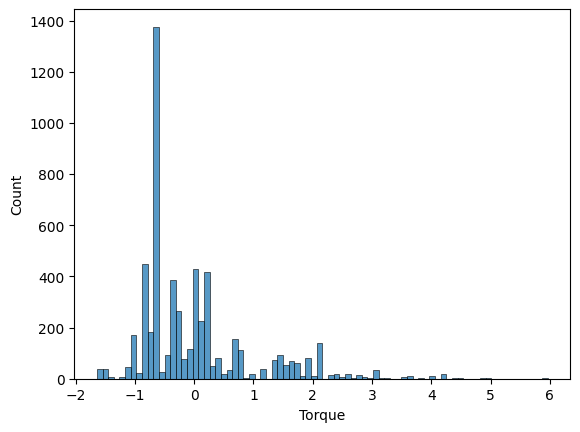

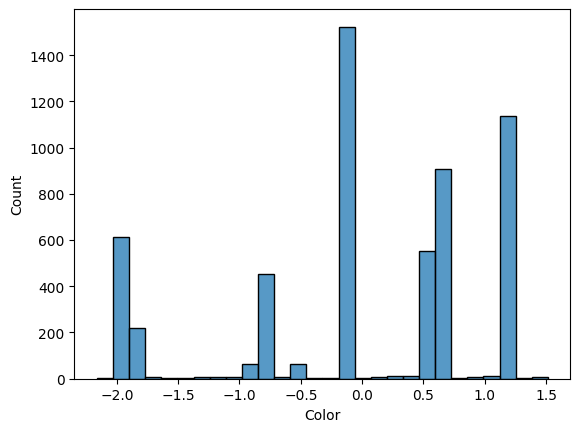

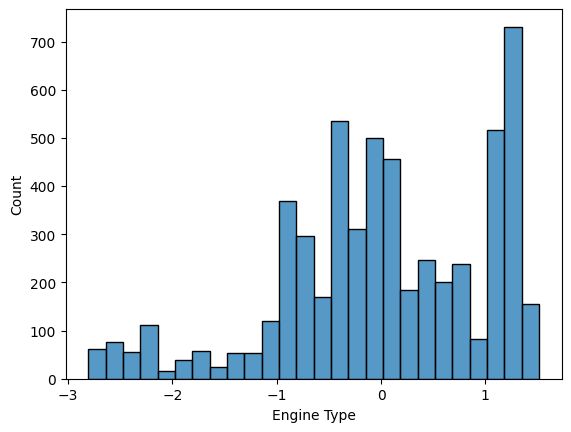

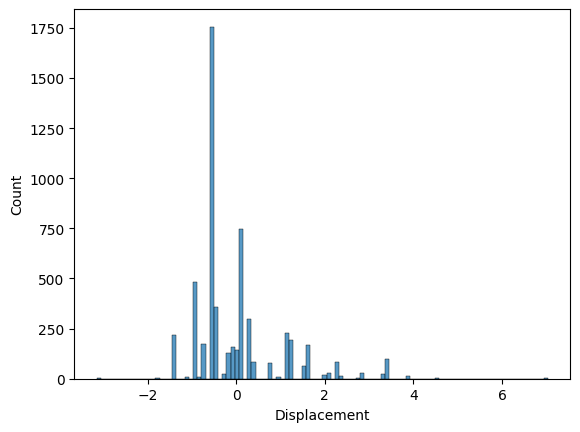

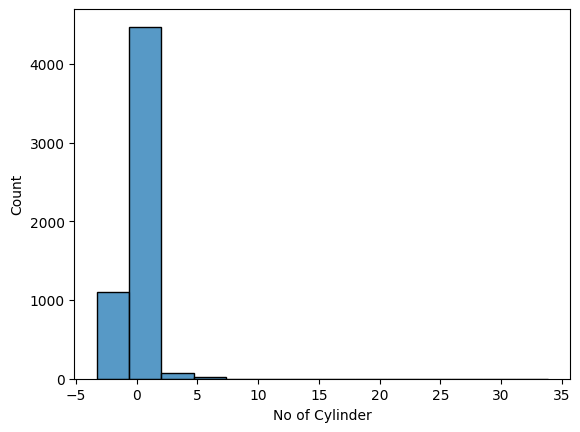

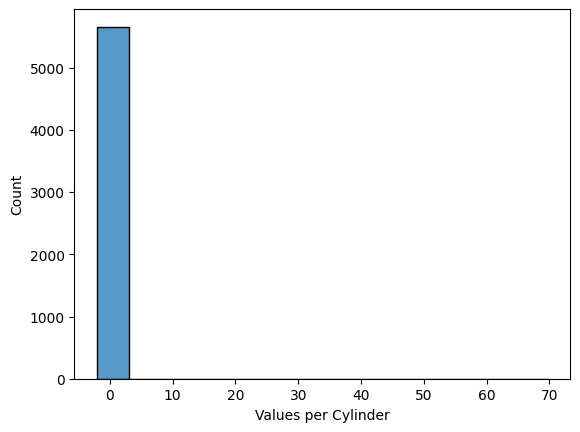

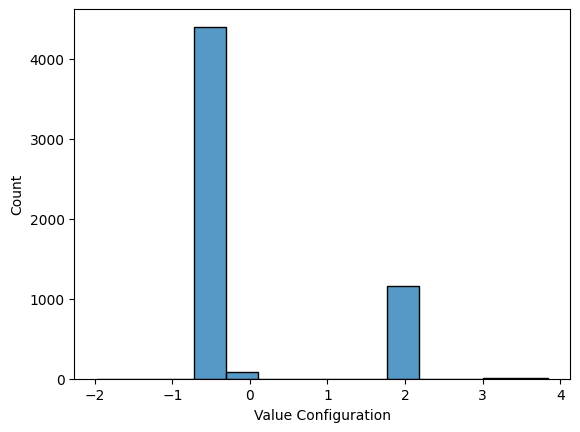

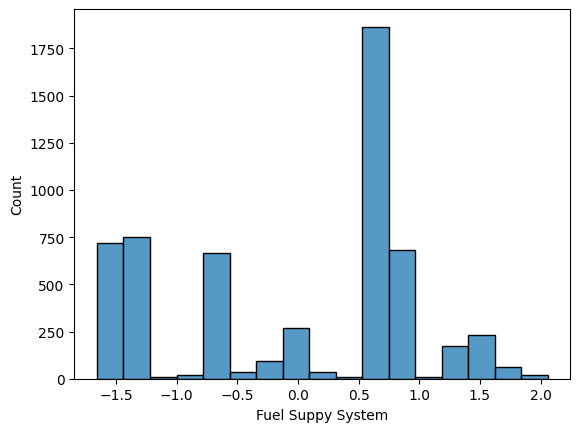

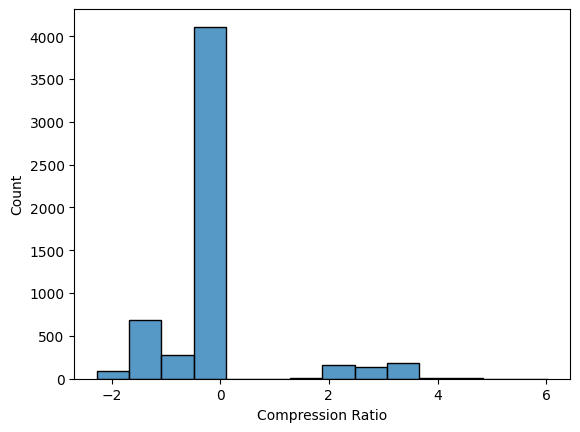

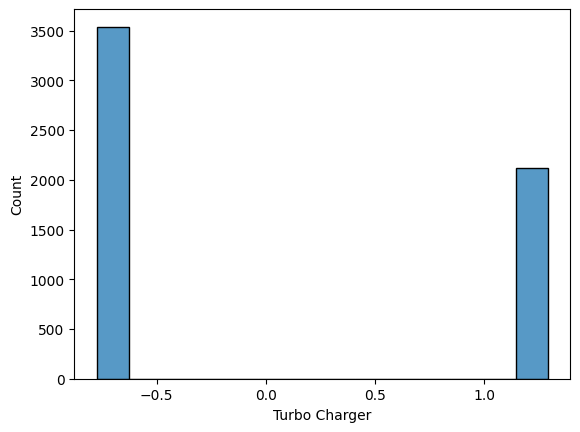

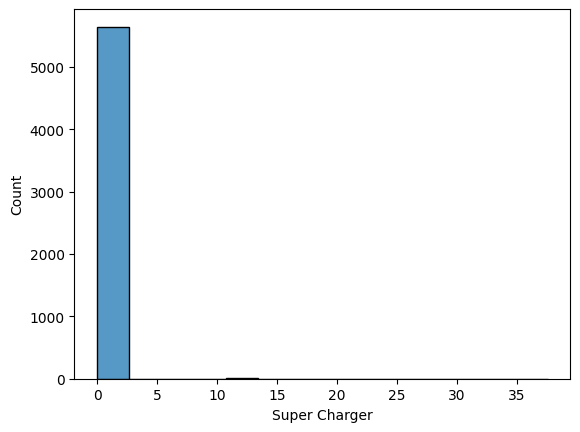

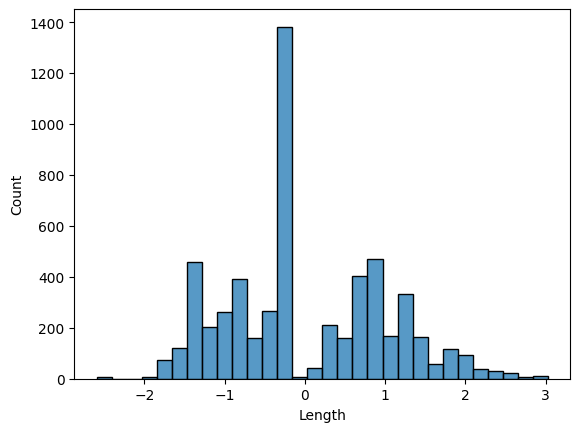

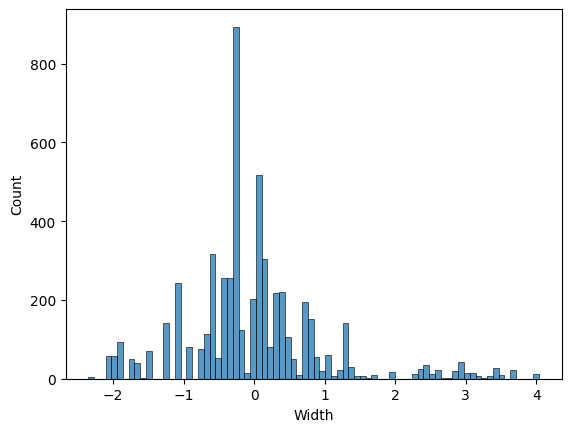

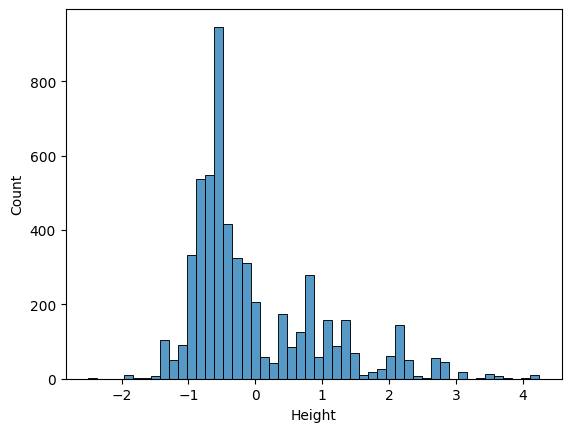

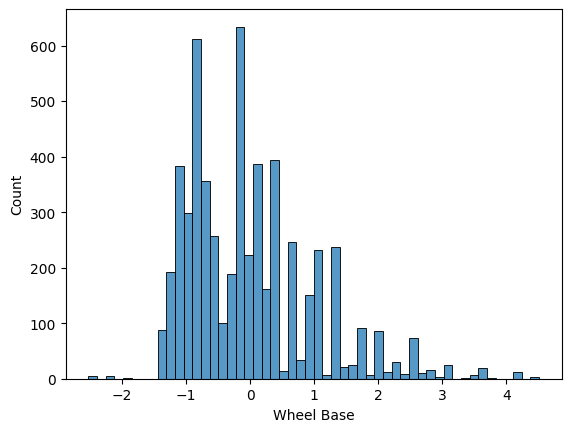

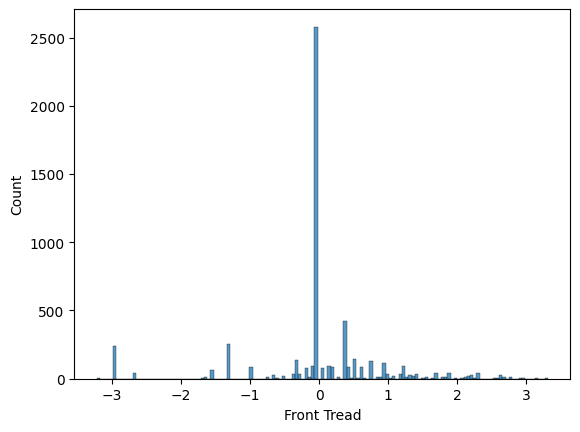

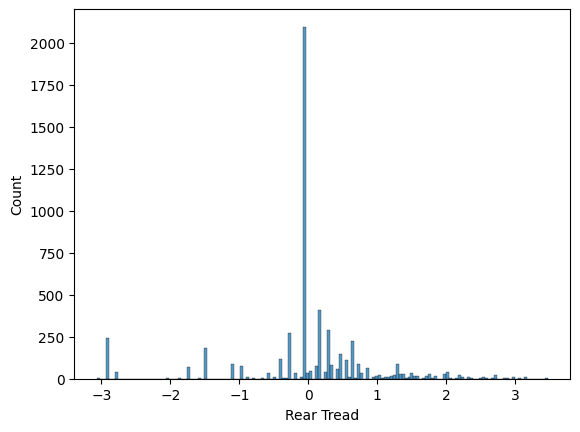

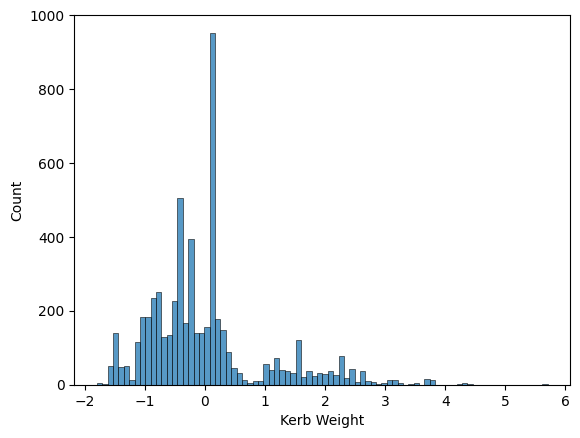

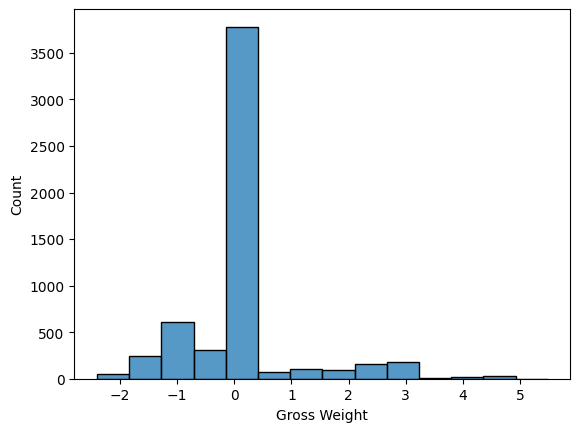

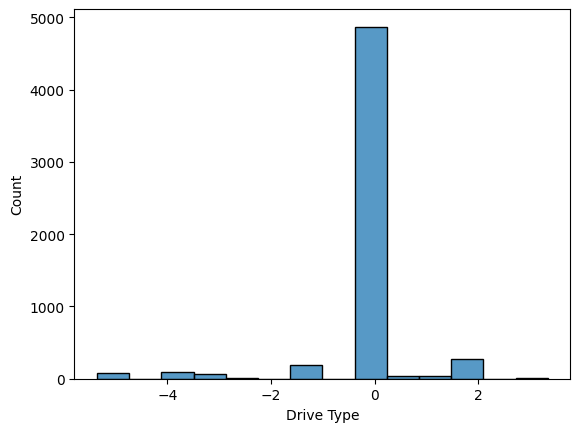

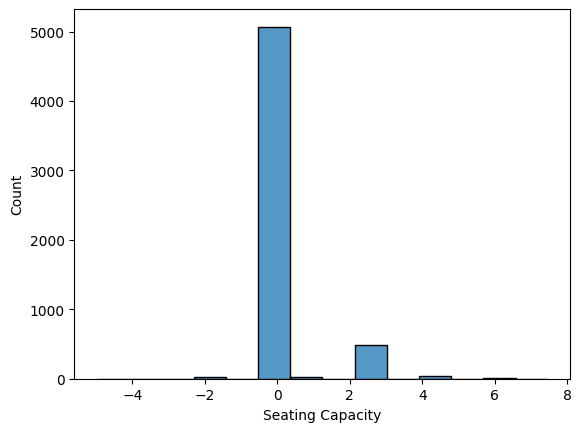

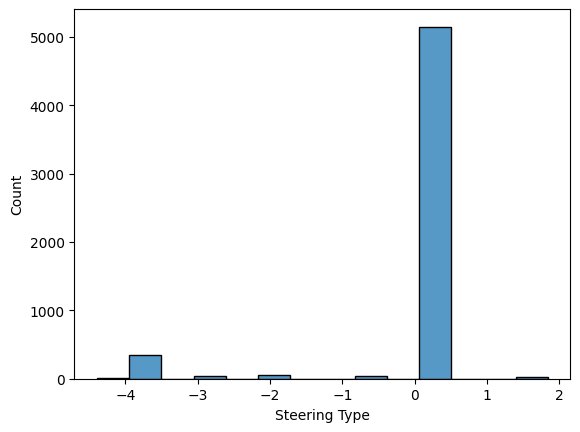

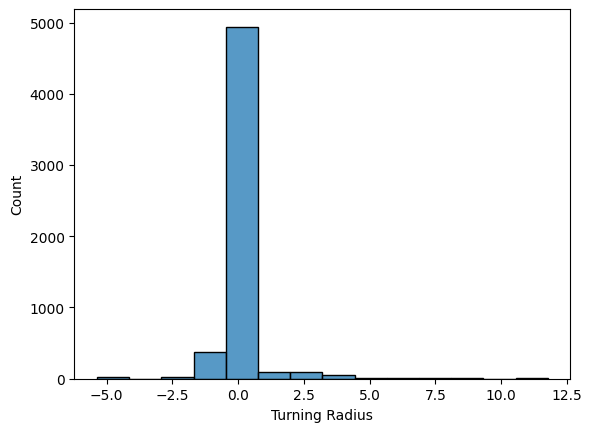

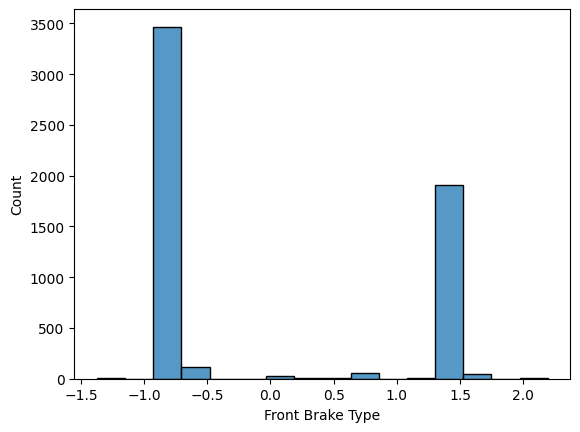

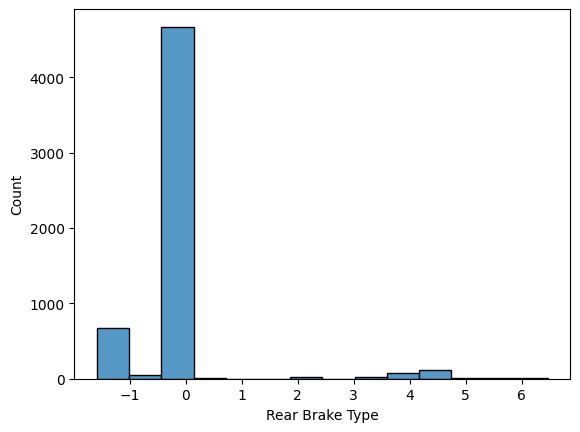

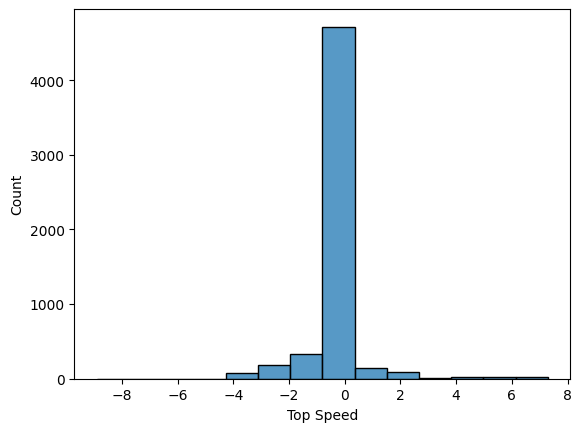

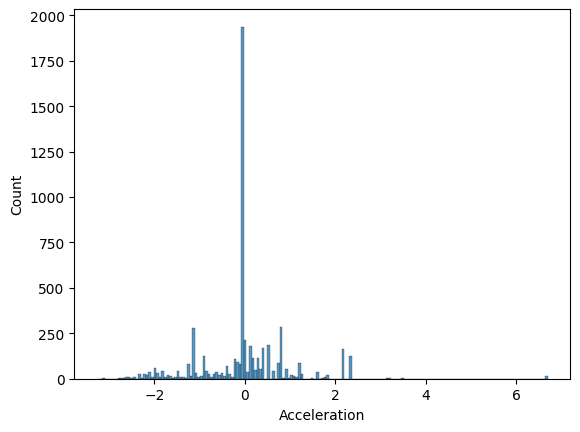

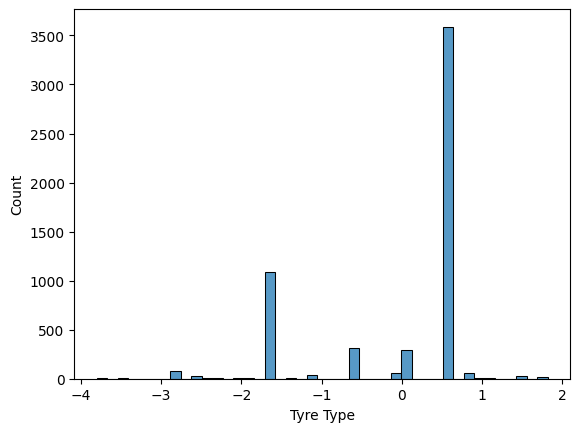

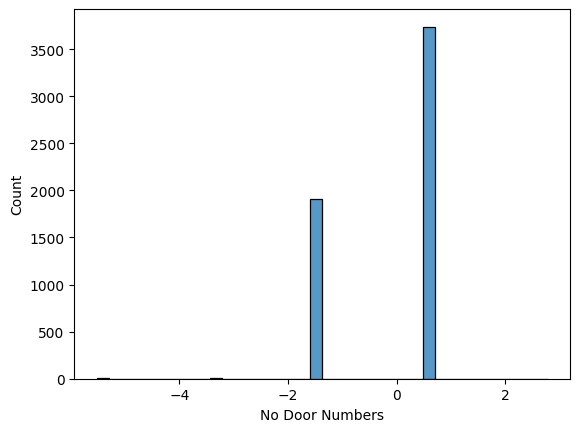

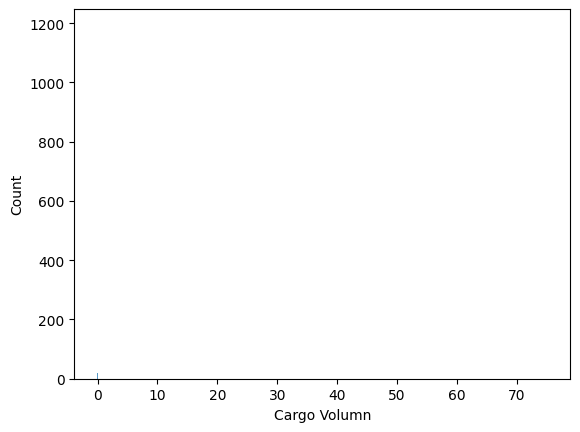

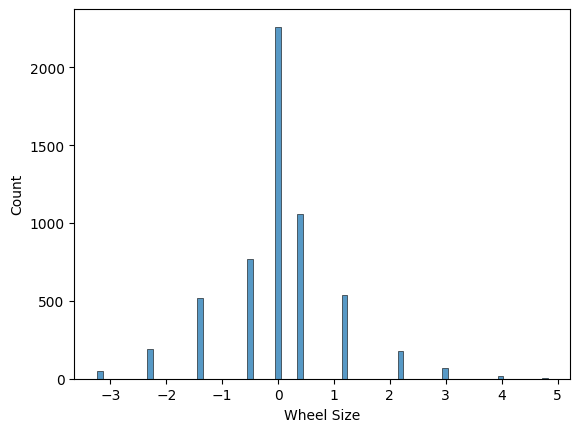

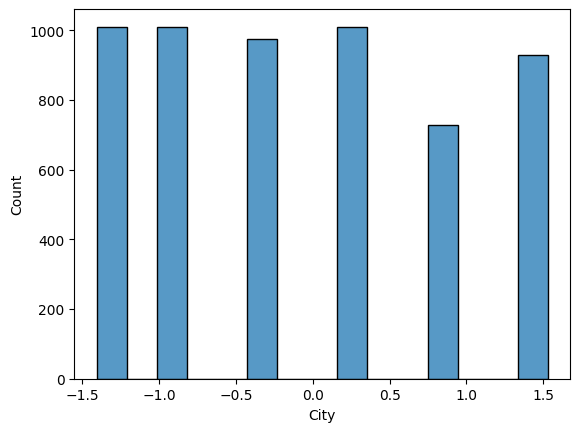

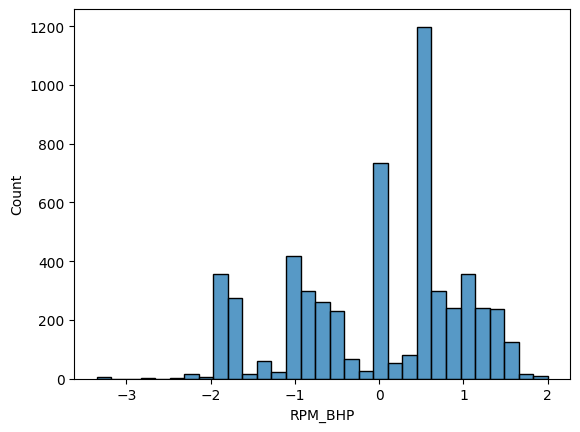

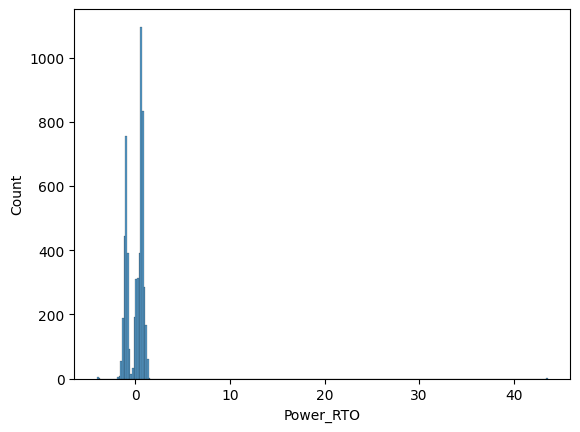

In [16]:
#histogram - to understand the distibution - frequency plot
#only for numerical columns

for i in df.columns:
    sns.histplot(data = df , x = i)
    plt.show()

outliers detection


In [7]:
!pip install plotly


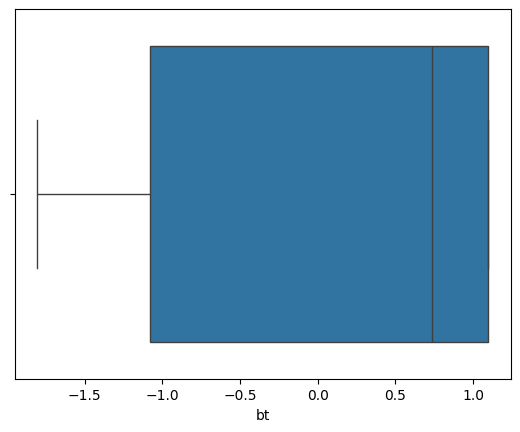

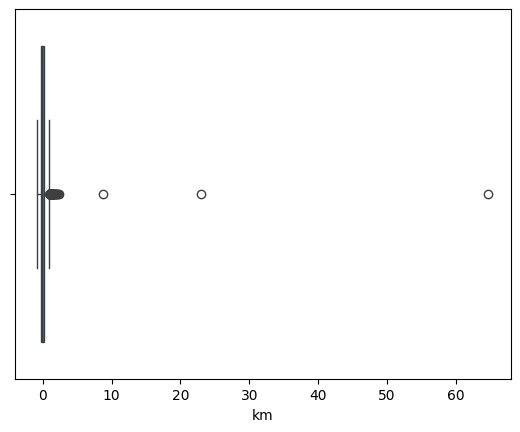

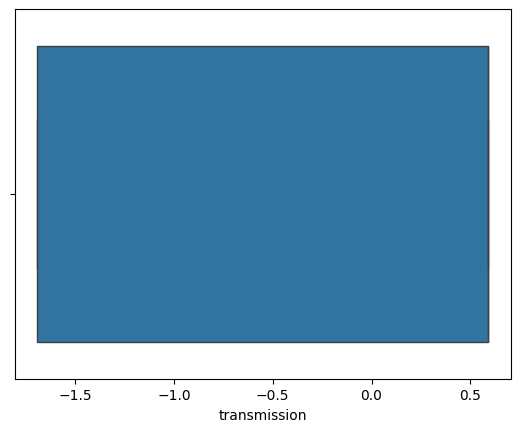

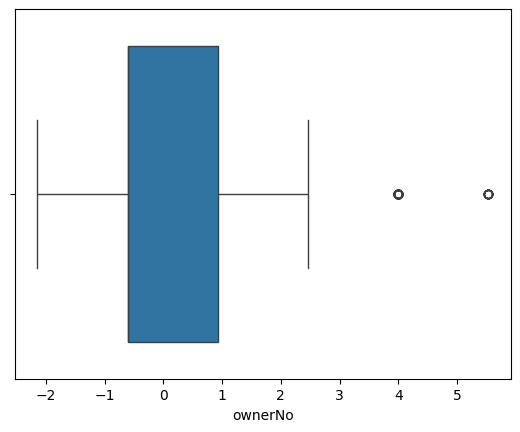

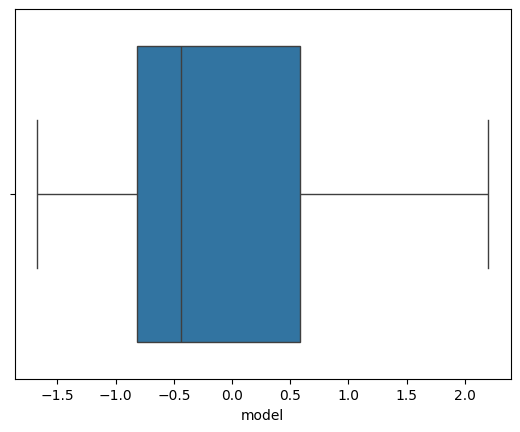

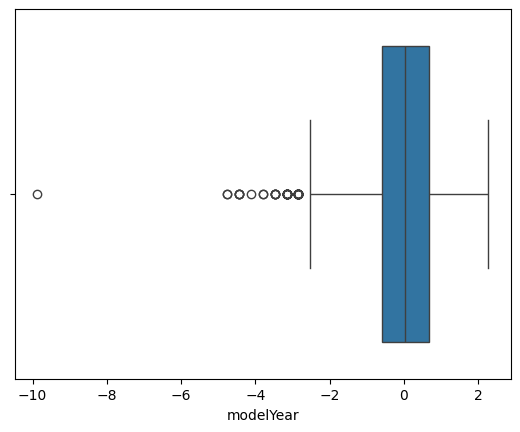

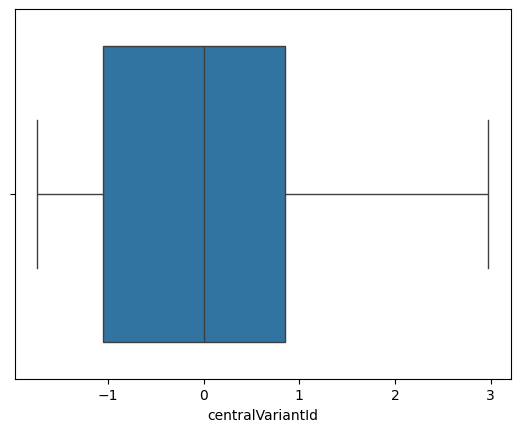

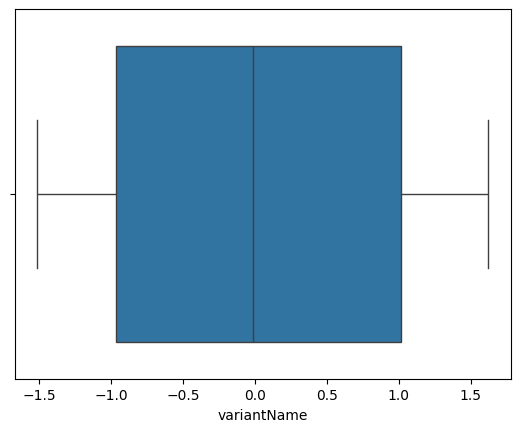

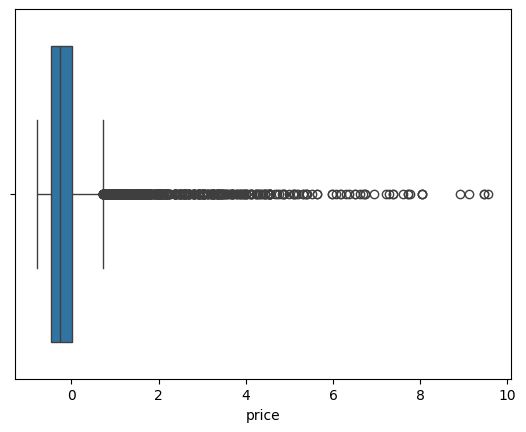

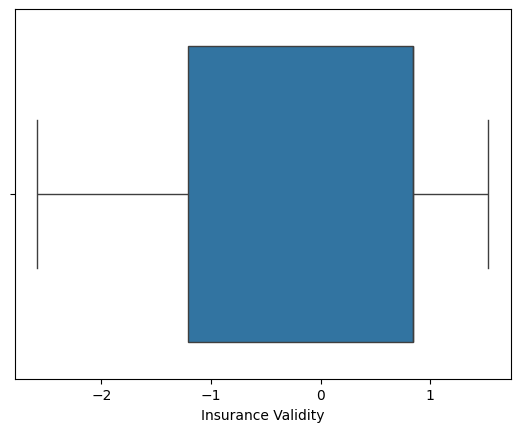

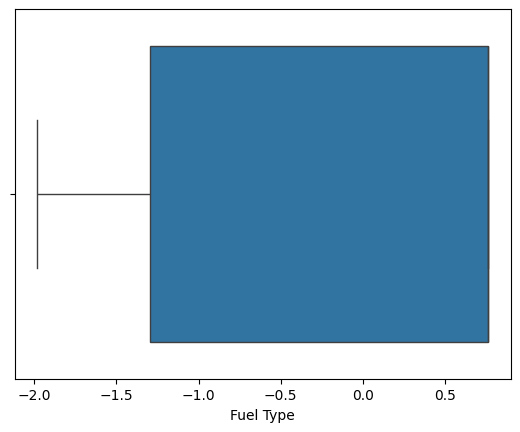

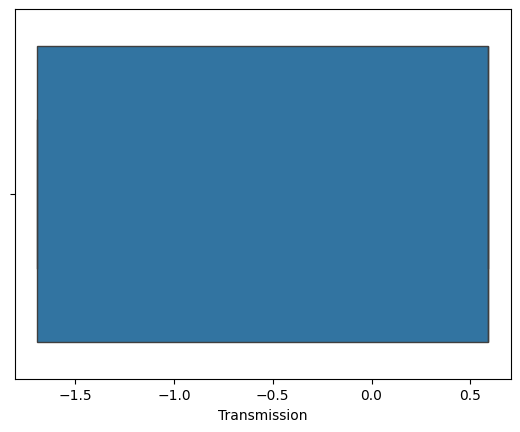

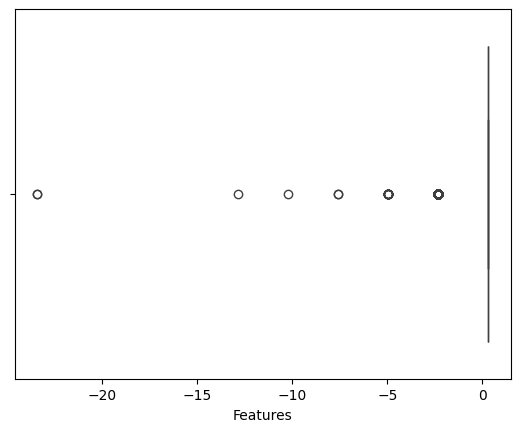

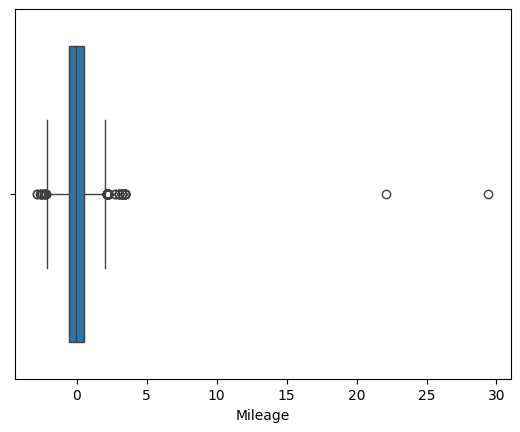

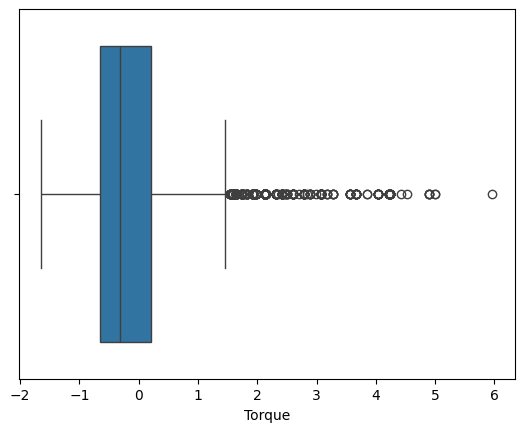

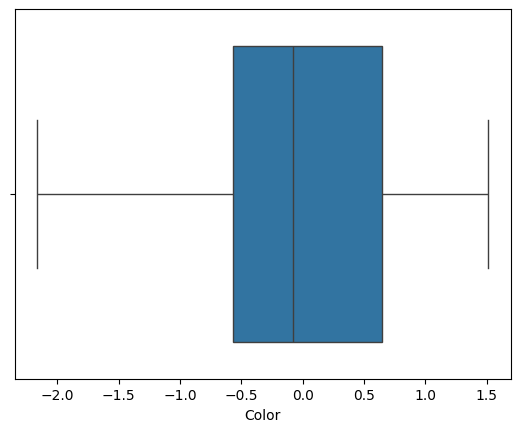

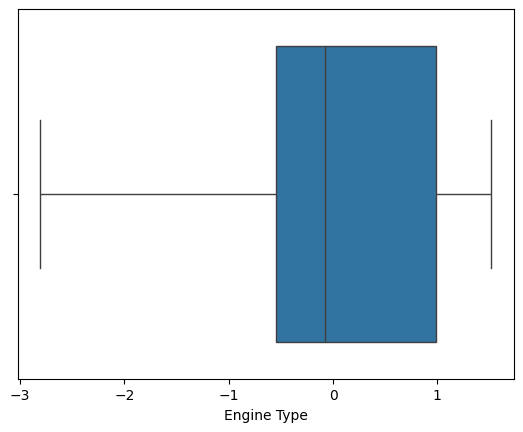

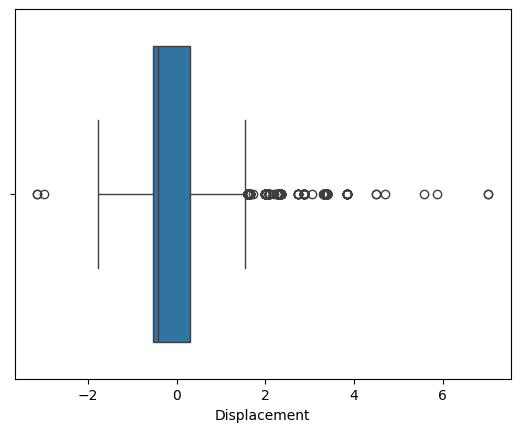

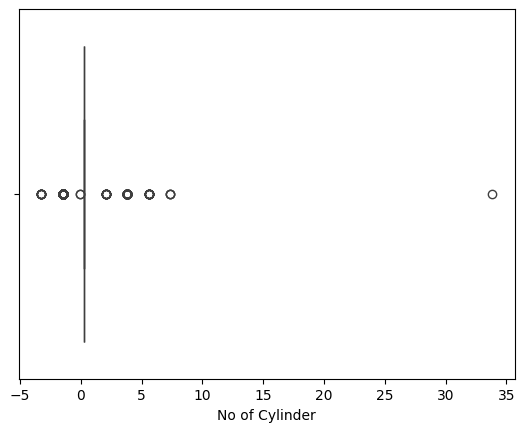

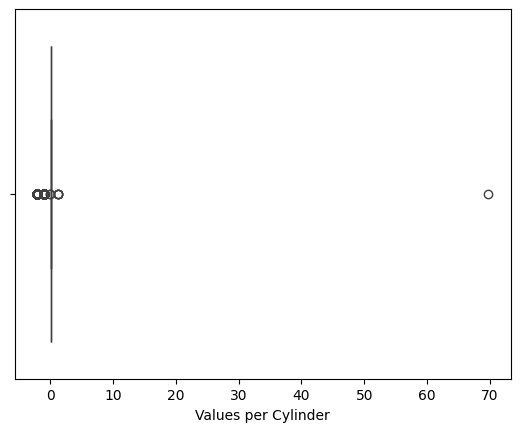

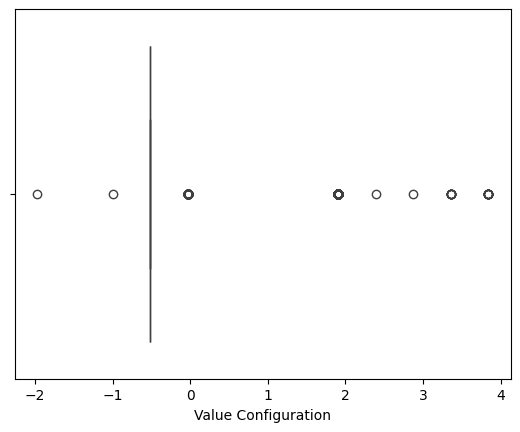

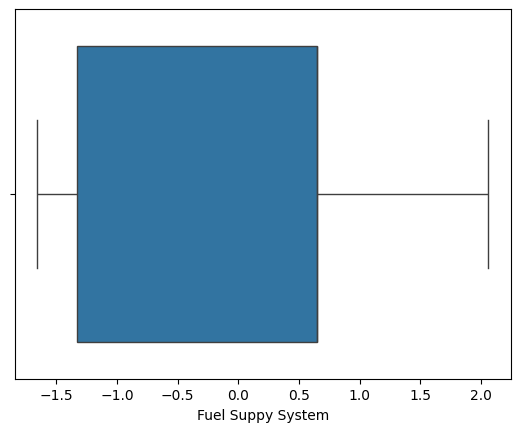

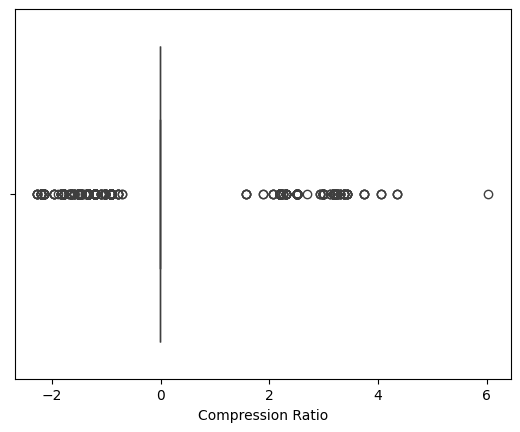

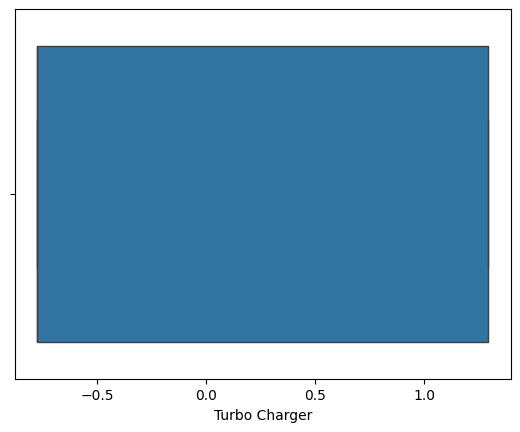

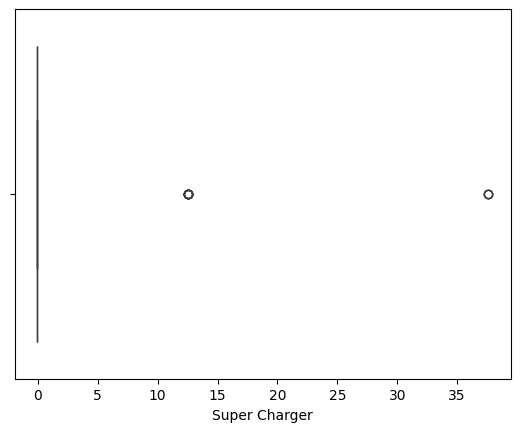

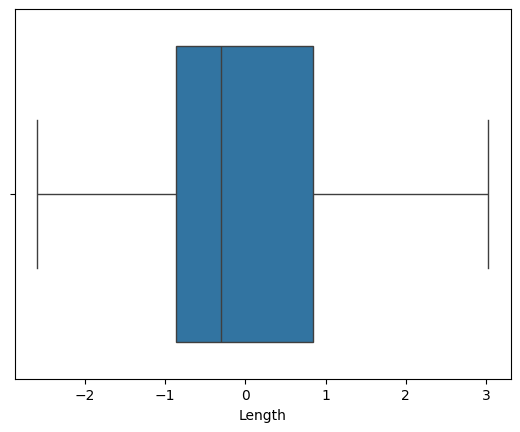

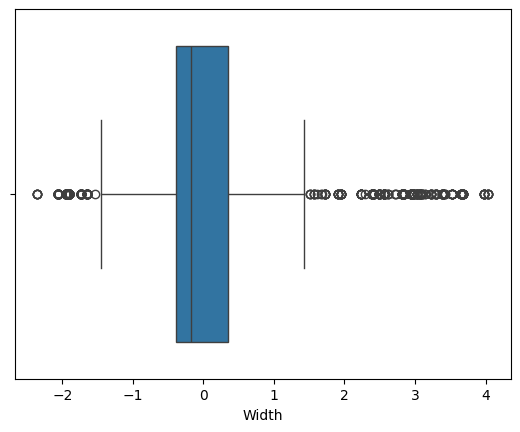

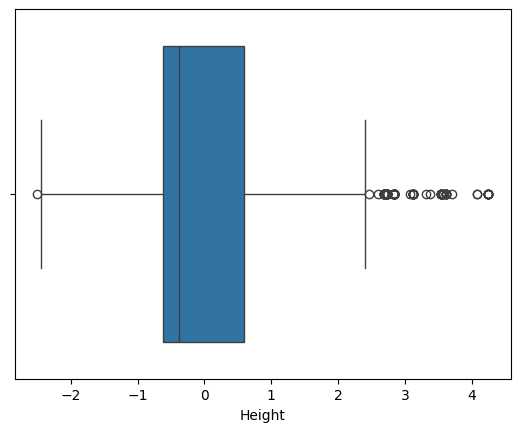

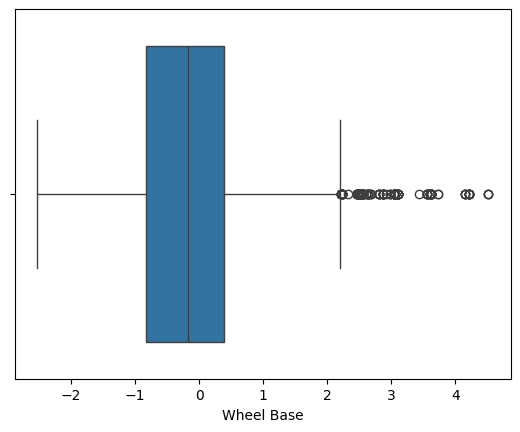

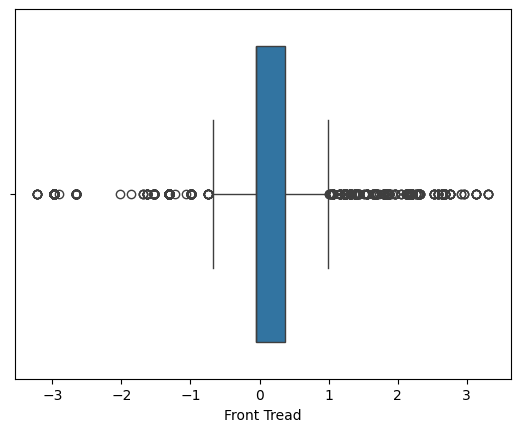

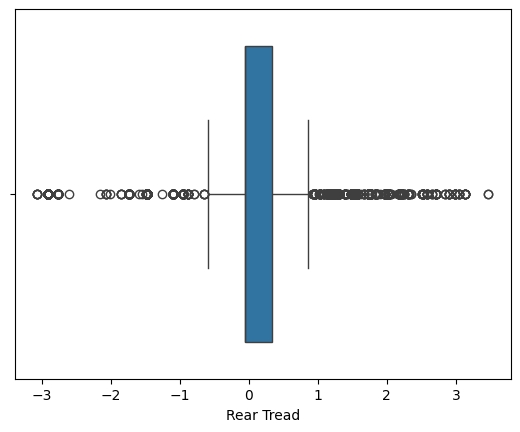

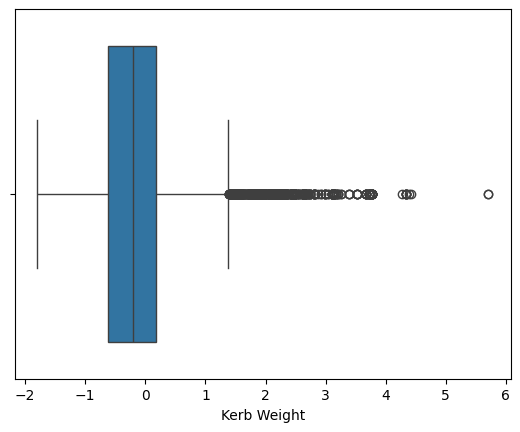

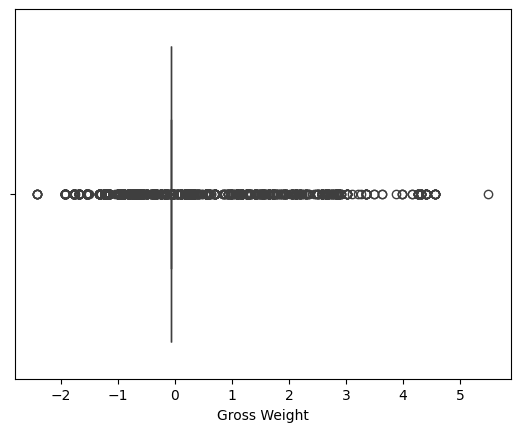

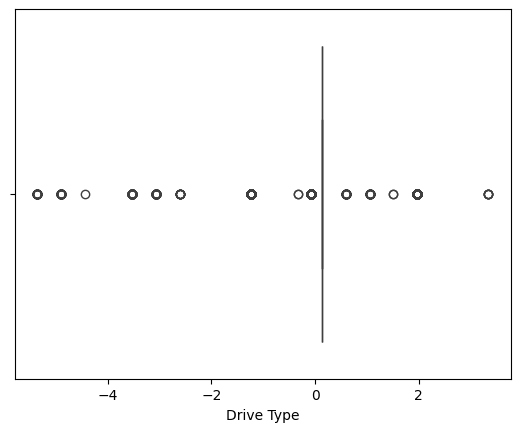

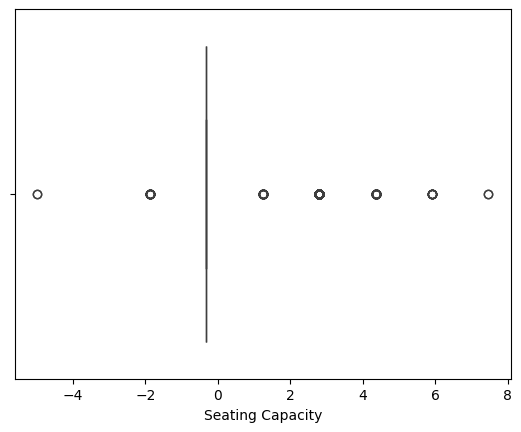

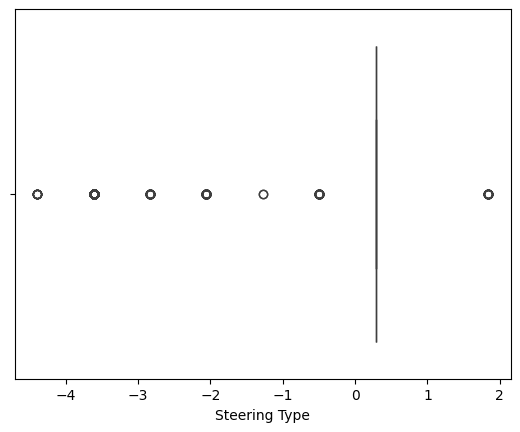

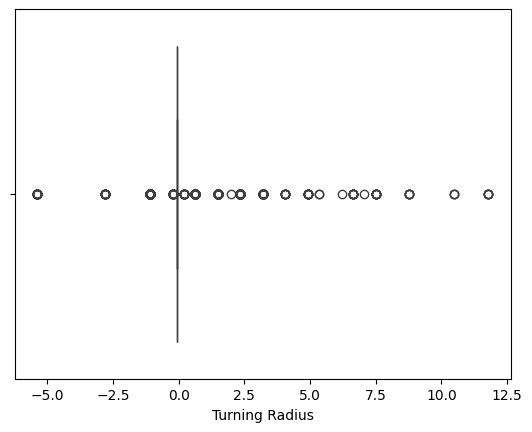

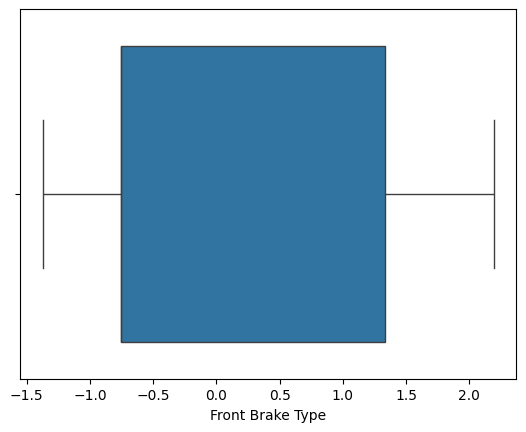

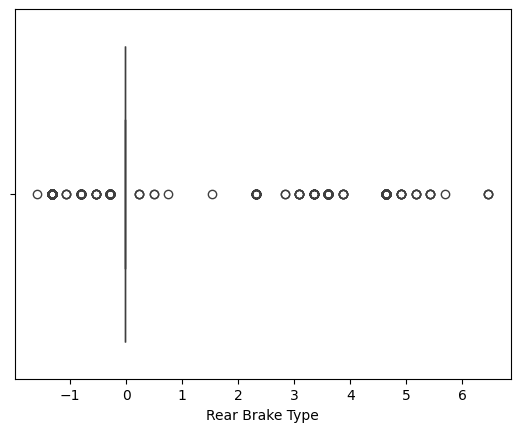

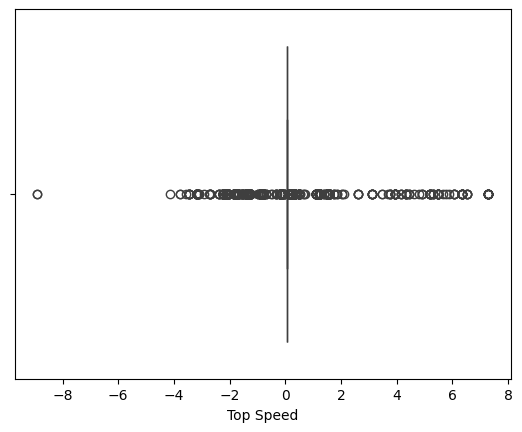

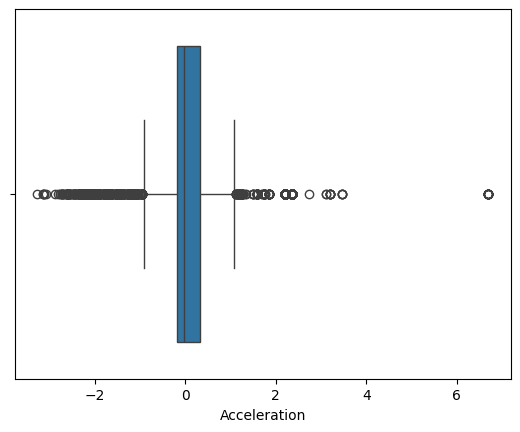

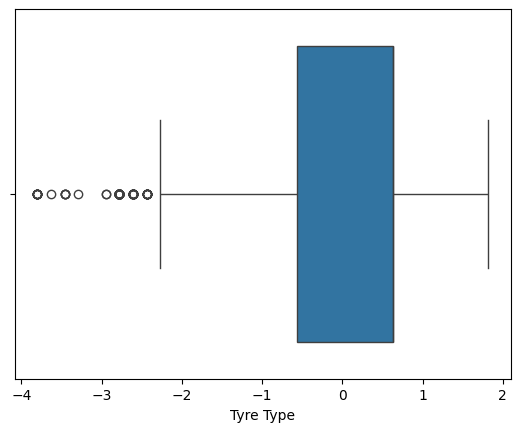

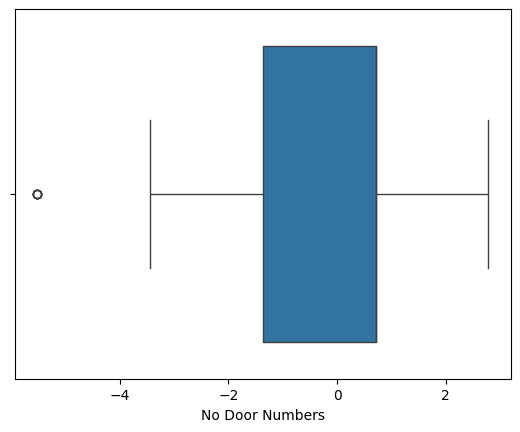

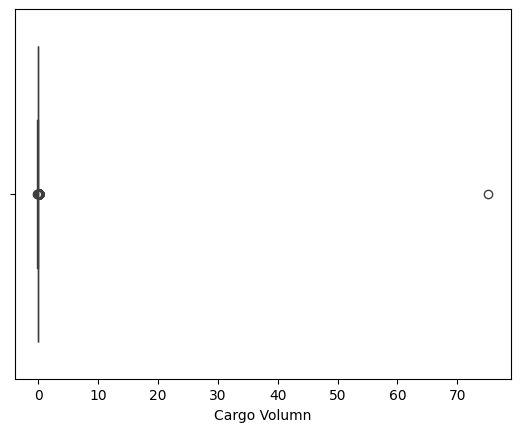

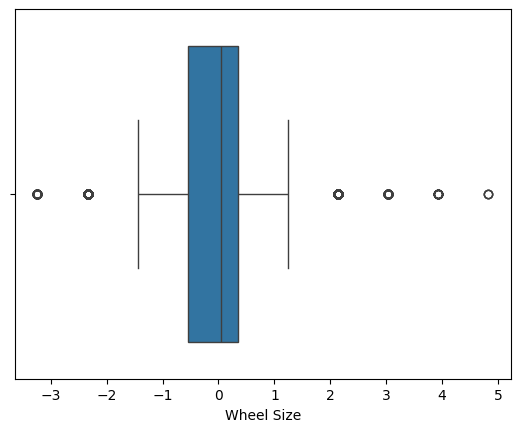

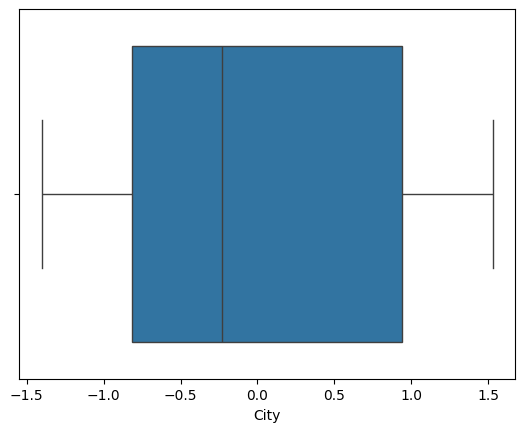

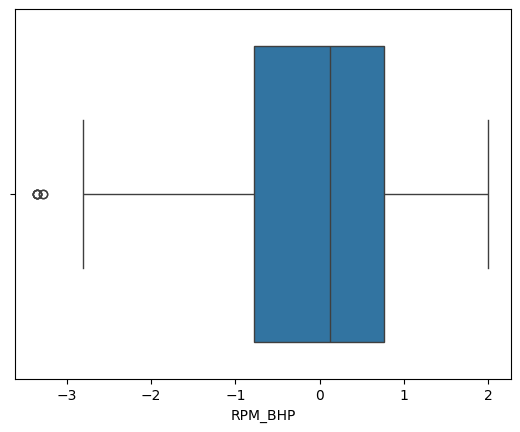

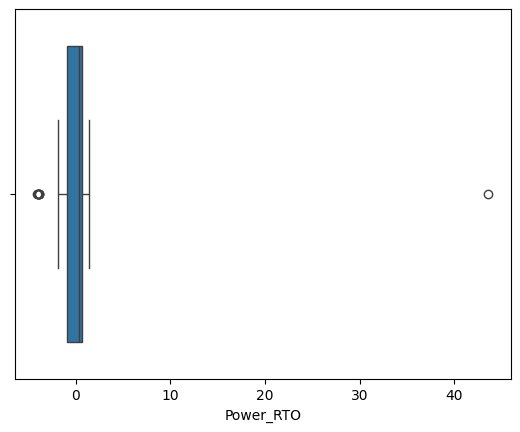

In [17]:
#boxplot for outliers

for i in df.columns:
    sns.boxplot(data=df, x = i)
    plt.show()

In [20]:
#ther is outliers in some columns

def outlier(col):
    q1,q3 =np.percentile(col,[25,75])
    iqr = q3-q1
    l_b = q1 - 1.5*iqr
    u_b = q3 + 1.5*iqr
    return l_b, u_b

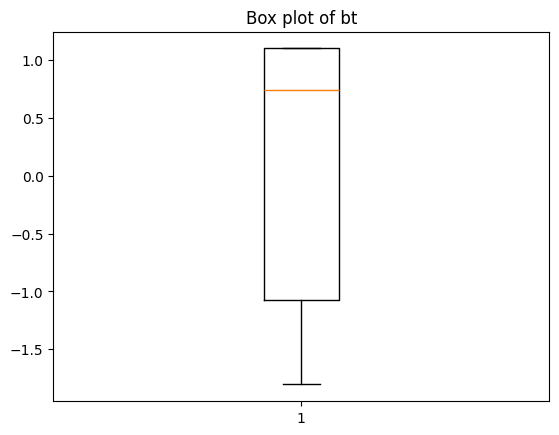

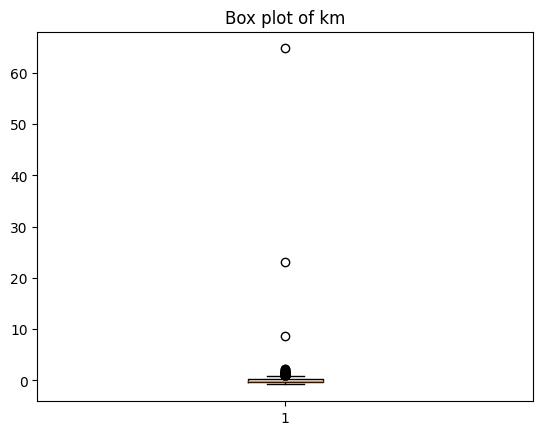

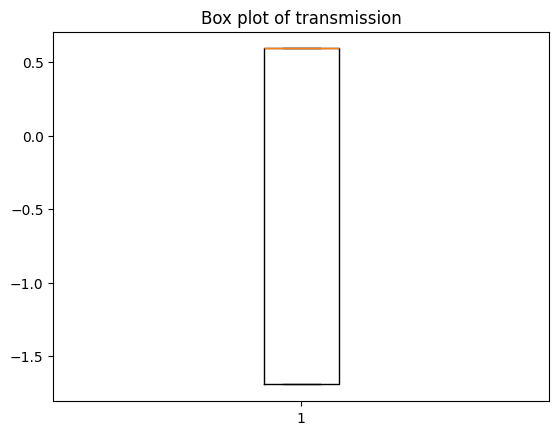

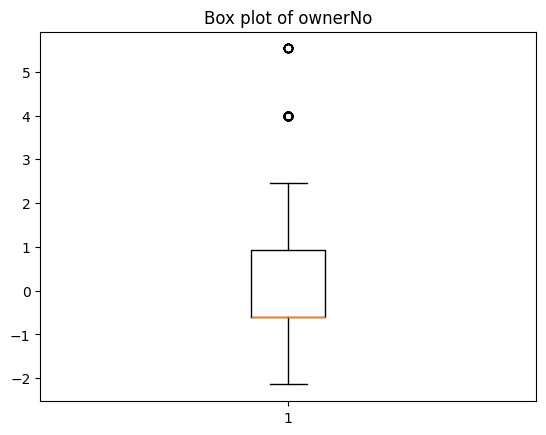

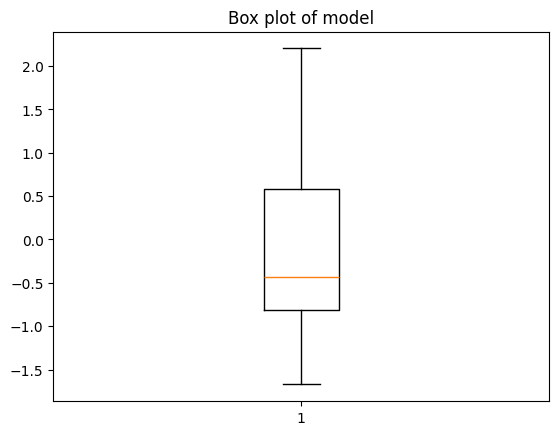

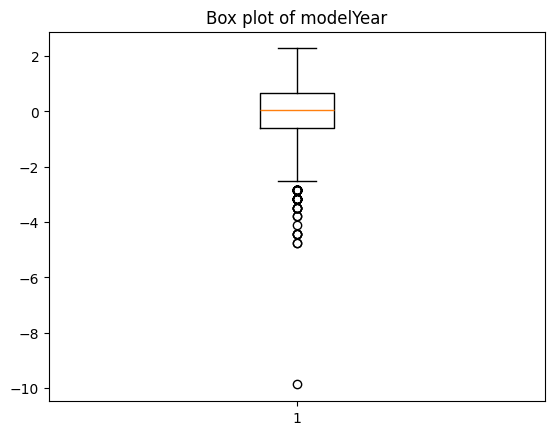

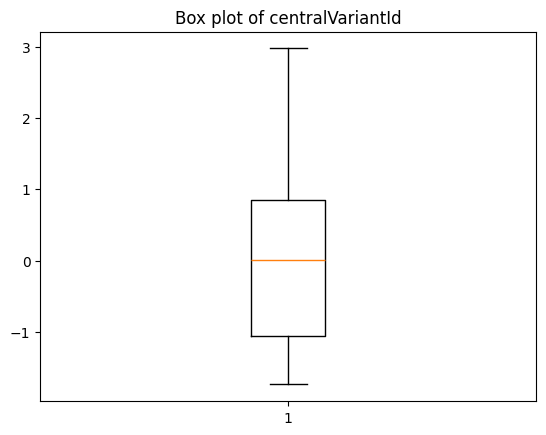

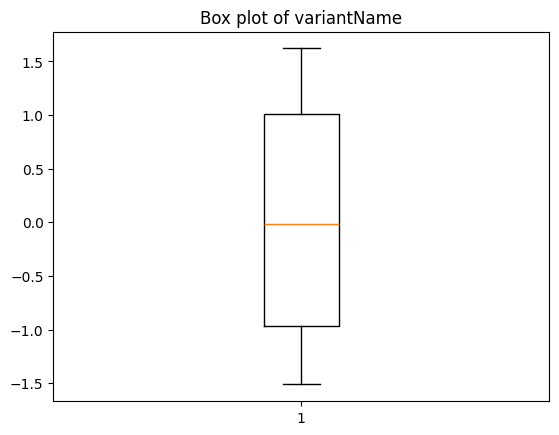

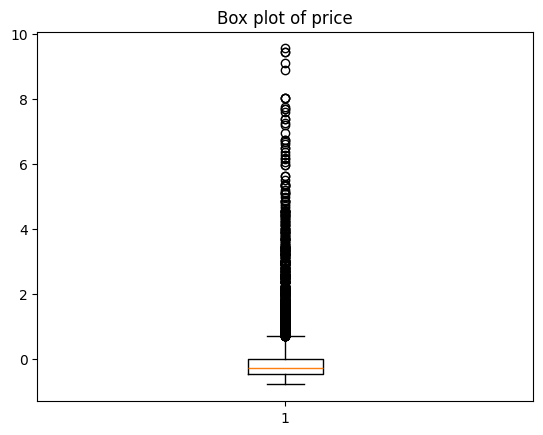

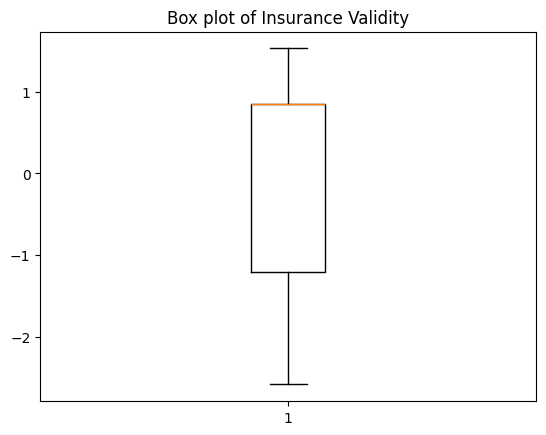

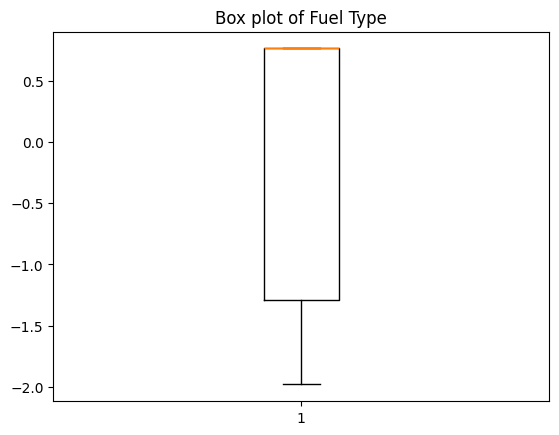

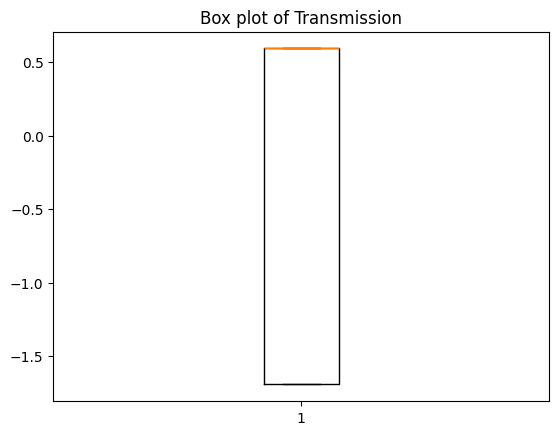

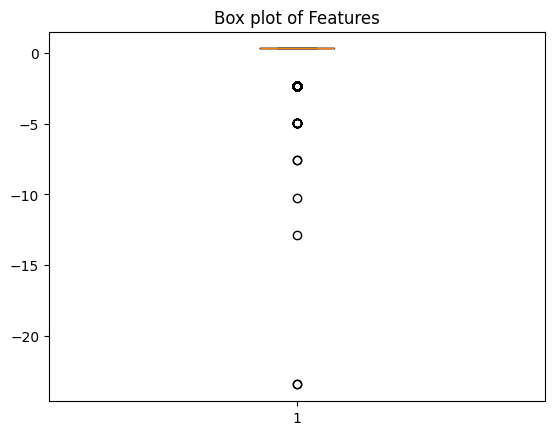

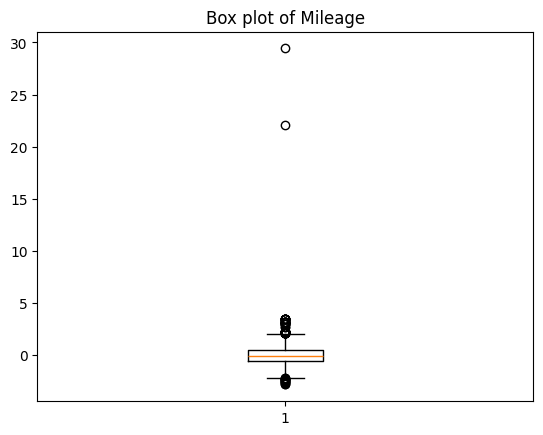

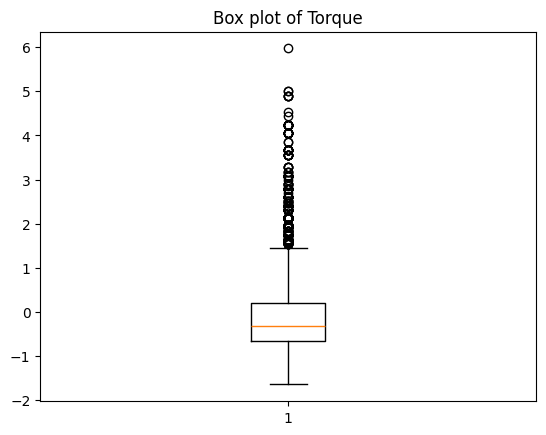

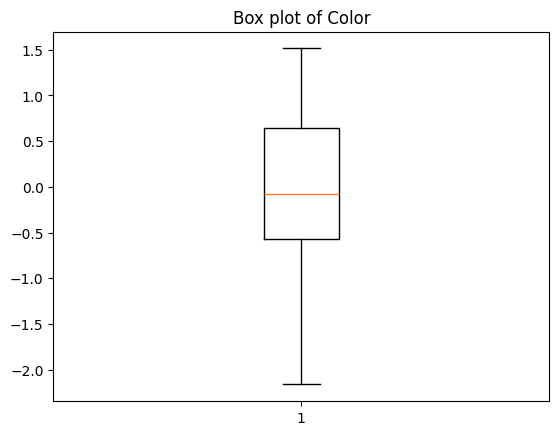

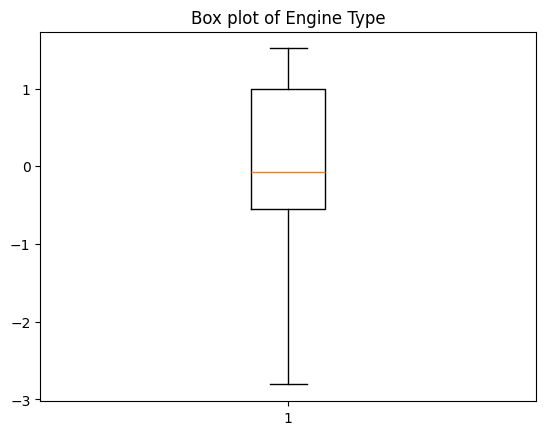

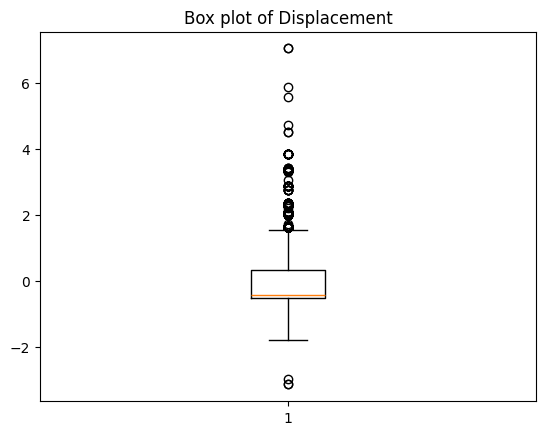

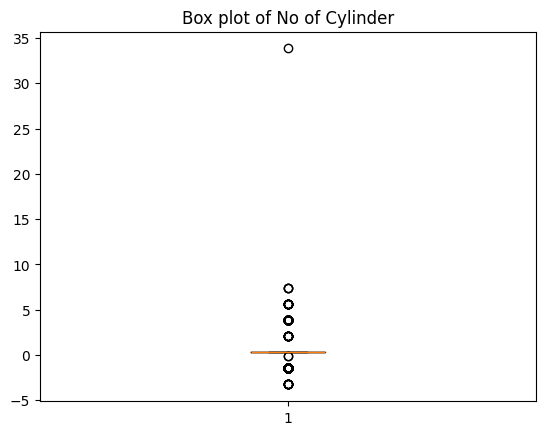

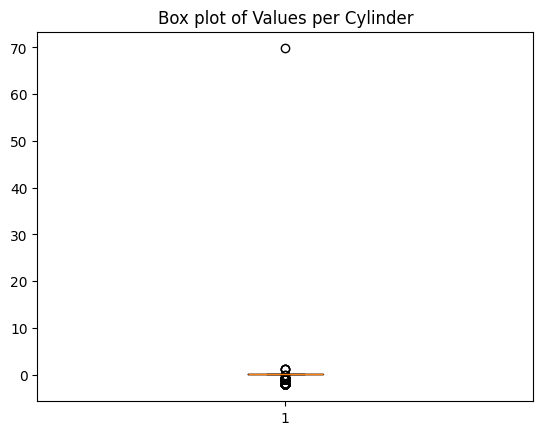

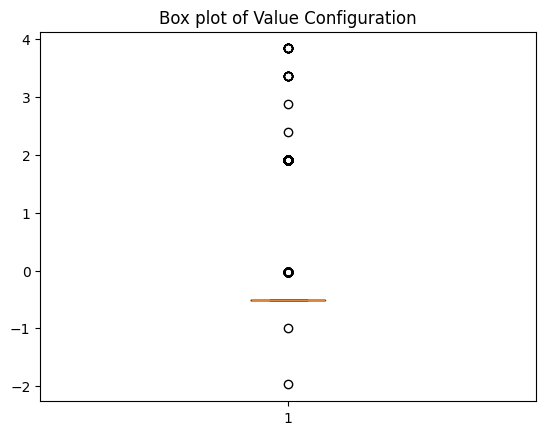

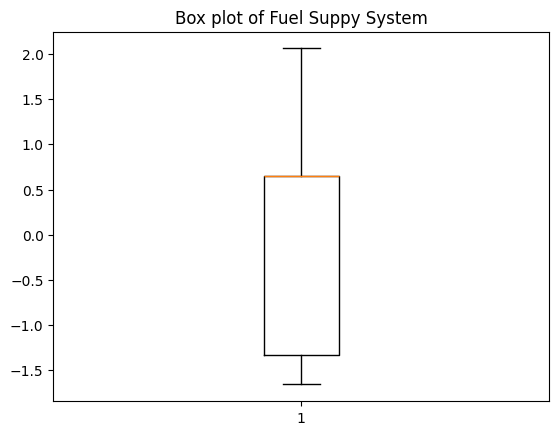

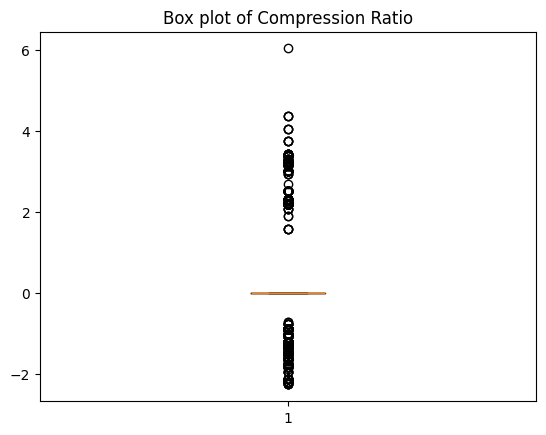

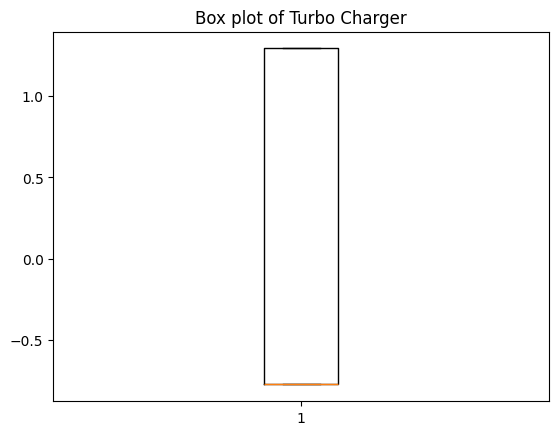

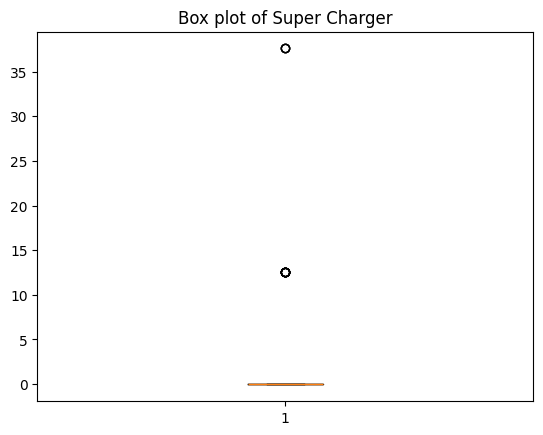

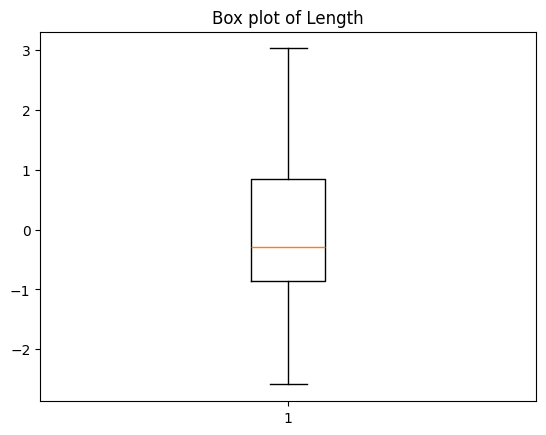

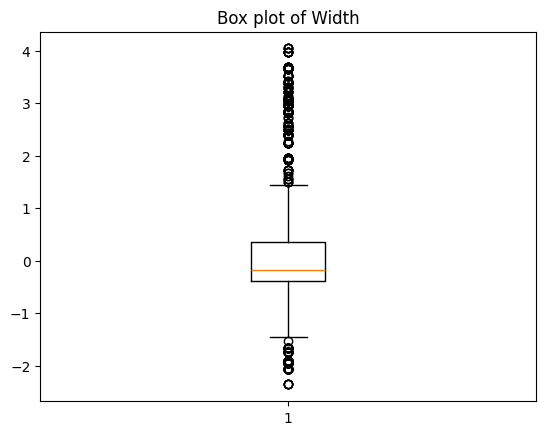

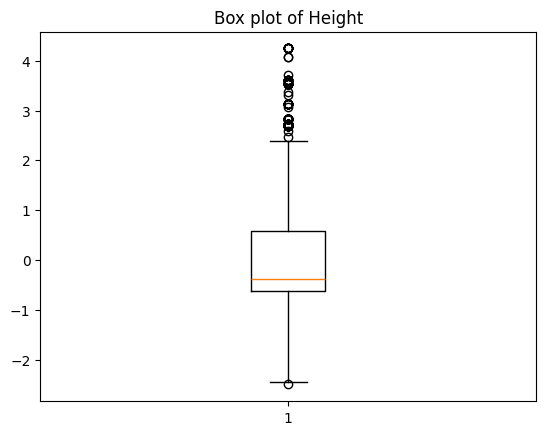

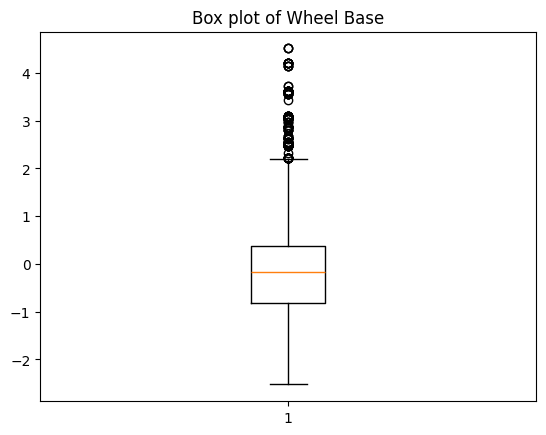

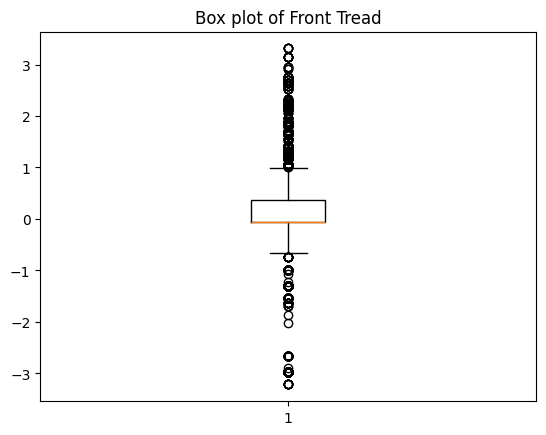

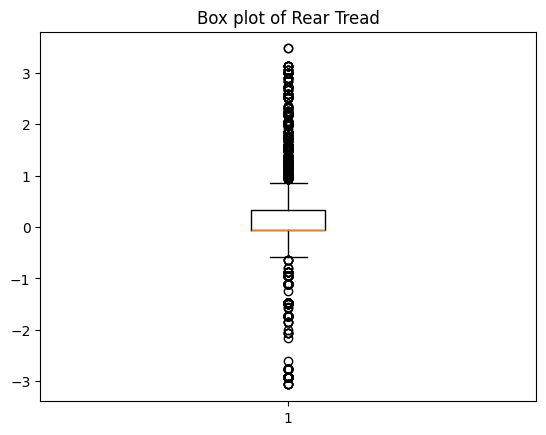

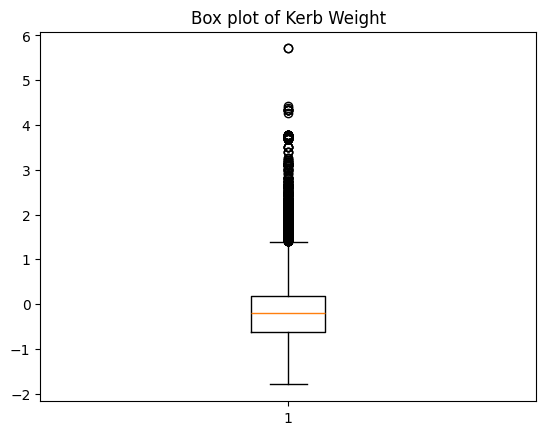

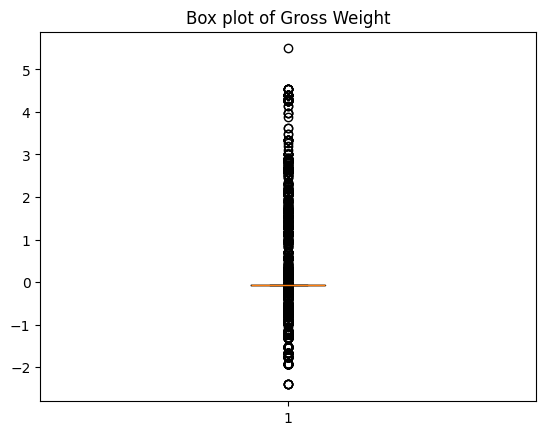

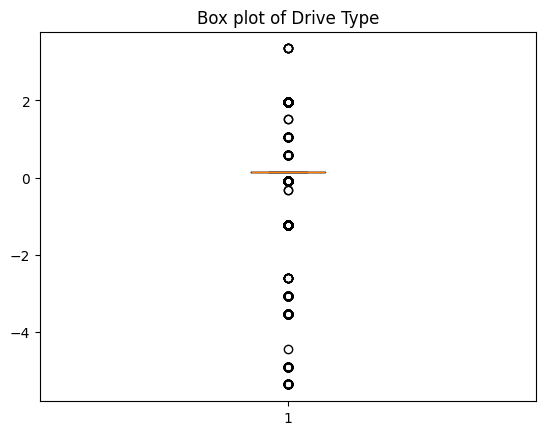

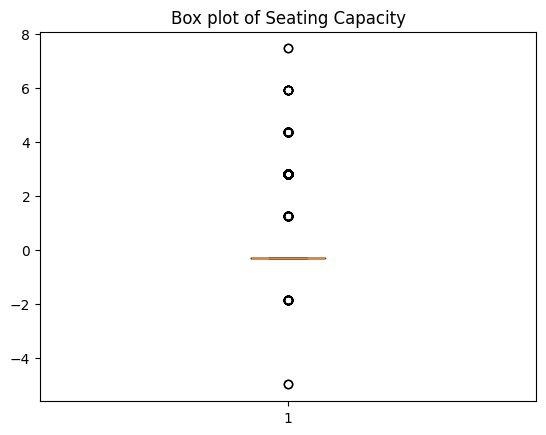

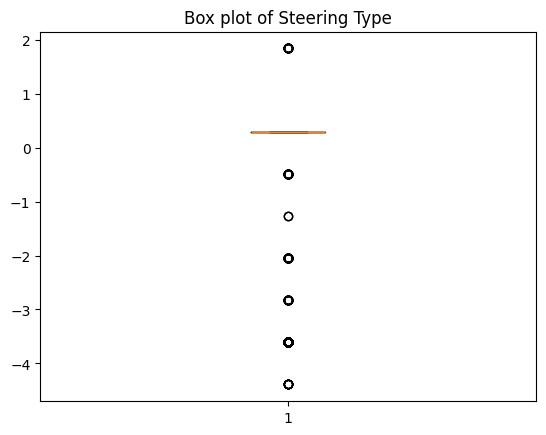

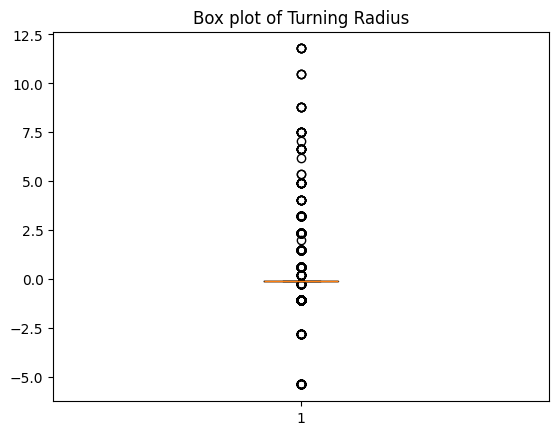

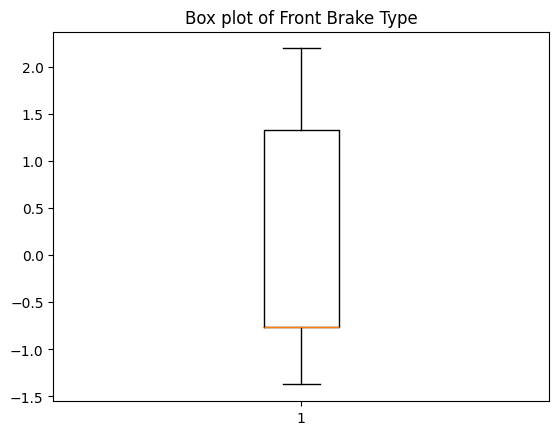

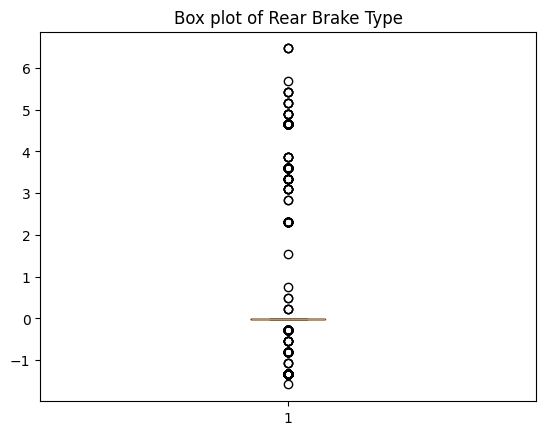

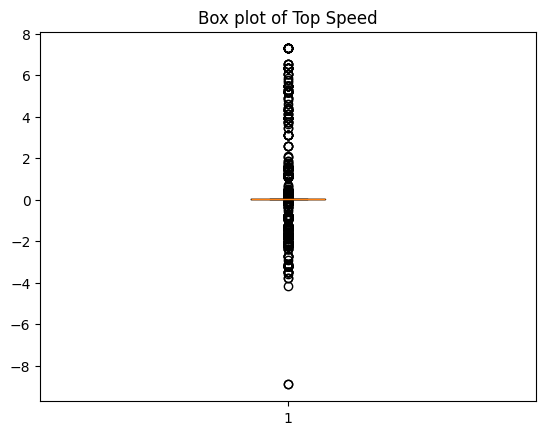

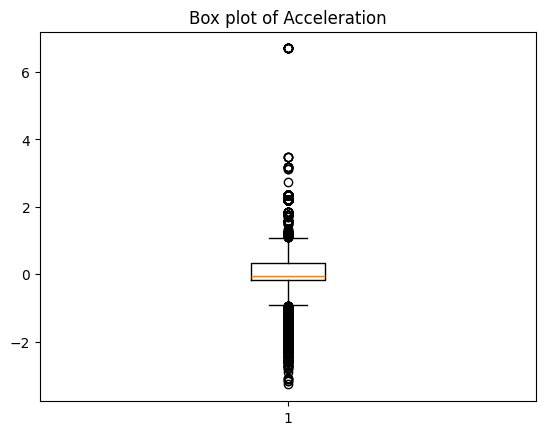

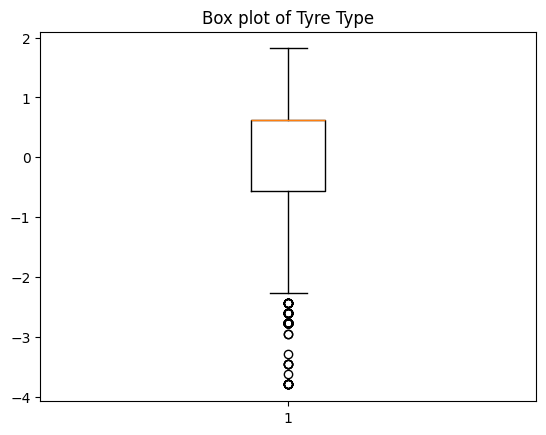

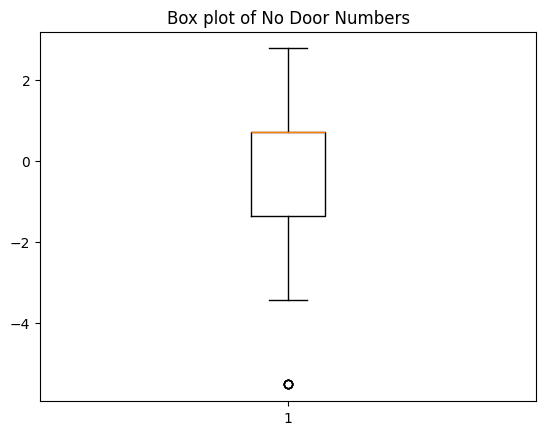

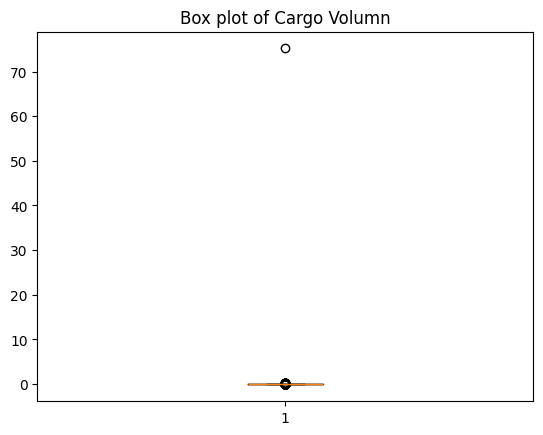

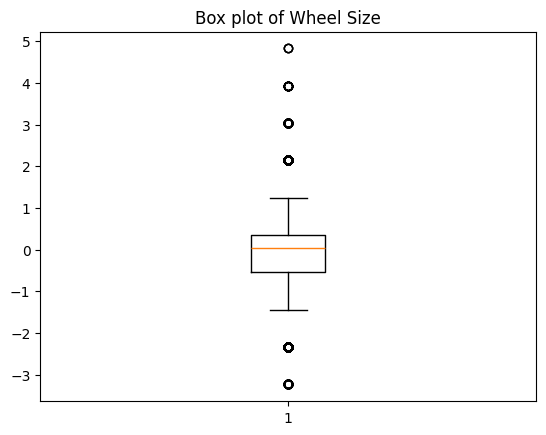

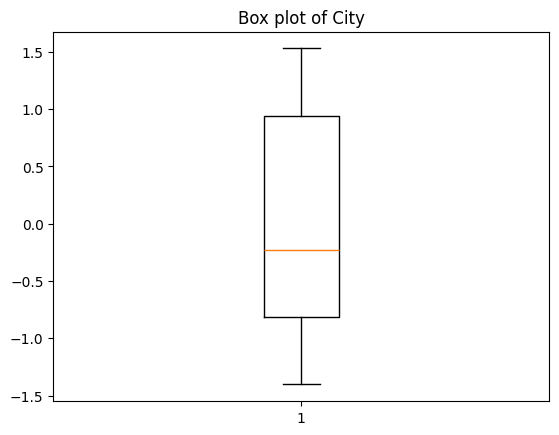

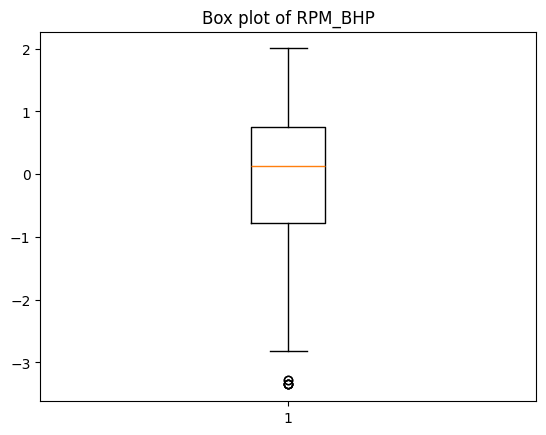

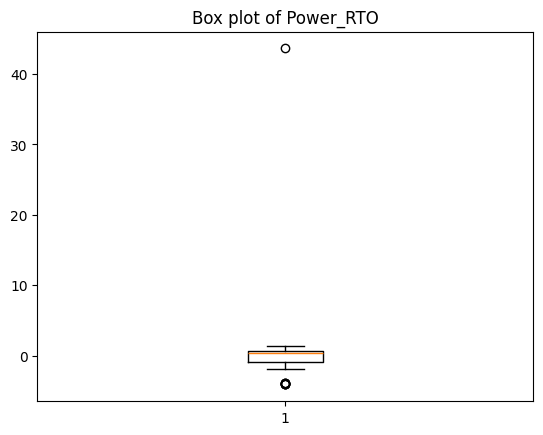

In [27]:
import matplotlib.pyplot as plt
for i in df.columns:
    plt.figure()  # Create a new figure for each box plot
    plt.boxplot(df[i])
    plt.title(f'Box plot of {i}')
    plt.show()

hypothesis testing


In [28]:
for i in df.columns:
  print(i,df[i].nunique())

bt 9
km 2872
transmission 2
ownerNo 6
model 206
modelYear 24
centralVariantId 1687
variantName 1383
price 1084
Insurance Validity 8
Fuel Type 5
Transmission 2
Features 7
Mileage 375
Torque 199
Color 120
Engine Type 284
Displacement 110
No of Cylinder 9
Values per Cylinder 6
Value Configuration 9
Fuel Suppy System 63
Compression Ratio 42
Turbo Charger 3
Super Charger 3
Length 231
Width 161
Height 172
Wheel Base 139
Front Tread 106
Rear Tread 122
Kerb Weight 376
Gross Weight 165
Drive Type 15
Seating Capacity 8
Steering Type 8
Turning Radius 21
Front Brake Type 23
Rear Brake Type 23
Top Speed 91
Acceleration 164
Tyre Type 25
No Door Numbers 5
Cargo Volumn 126
Wheel Size 11
City 6
RPM_BHP 347
Power_RTO 1368


In [29]:
cont = []
cat = []
for i in df.columns:
  if df[i].nunique()>30:
    cont.append(i)
  else:
    cat.append(i)



In [30]:
cont

['km',
 'model',
 'centralVariantId',
 'variantName',
 'price',
 'Mileage',
 'Torque',
 'Color',
 'Engine Type',
 'Displacement',
 'Fuel Suppy System',
 'Compression Ratio',
 'Length',
 'Width',
 'Height',
 'Wheel Base',
 'Front Tread',
 'Rear Tread',
 'Kerb Weight',
 'Gross Weight',
 'Top Speed',
 'Acceleration',
 'Cargo Volumn',
 'RPM_BHP',
 'Power_RTO']

In [31]:
cat

['bt',
 'transmission',
 'ownerNo',
 'modelYear',
 'Insurance Validity',
 'Fuel Type',
 'Transmission',
 'Features',
 'No of Cylinder',
 'Values per Cylinder',
 'Value Configuration',
 'Turbo Charger',
 'Super Charger',
 'Drive Type',
 'Seating Capacity',
 'Steering Type',
 'Turning Radius',
 'Front Brake Type',
 'Rear Brake Type',
 'Tyre Type',
 'No Door Numbers',
 'Wheel Size',
 'City']

skewness and kurtosis

In [34]:
from scipy.stats import norm

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
#skew value should nearer to 0(-0.3 to 0.3)
for i in df.columns:
  print(i, df[i].skew())
  

bt -0.07584517430162478
km 50.280690494167544
transmission -1.1001980259531239
ownerNo 1.71745368665508
model 0.5243167825014506
modelYear -0.9267208188635145
centralVariantId 0.06607882681074972
variantName 0.04090204658790261
price 4.091779500767008
Insurance Validity -0.27112290812186496
Fuel Type -0.562434062958525
Transmission -1.1001980259531239
Features -6.920278051305665
Mileage 6.554074431740092
Torque 1.65108845837335
Color -0.7280644179705068
Engine Type -0.636443658458045
Displacement 1.6393988587268342
No of Cylinder 7.5021016249084225
Values per Cylinder 59.77581987979215
Value Configuration 1.4759174581049366
Fuel Suppy System -0.2983332479036733
Compression Ratio 1.5505338085222644
Turbo Charger 0.5189697989633144
Super Charger 31.307726823726536
Length 0.3517744724455239
Width 1.0712002945929306
Height 1.322794347253129
Wheel Base 1.07148679954411
Front Tread -0.6956386439816871
Rear Tread -0.6991762322210188
Kerb Weight 1.354831568886608
Gross Weight 1.694883562902337

bt -0.07584517430162478


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


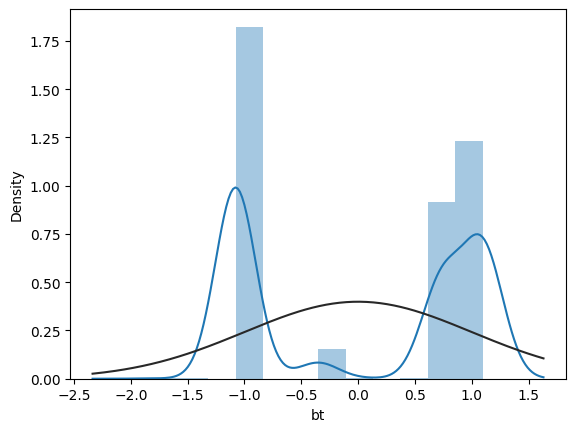

km 50.280690494167544


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


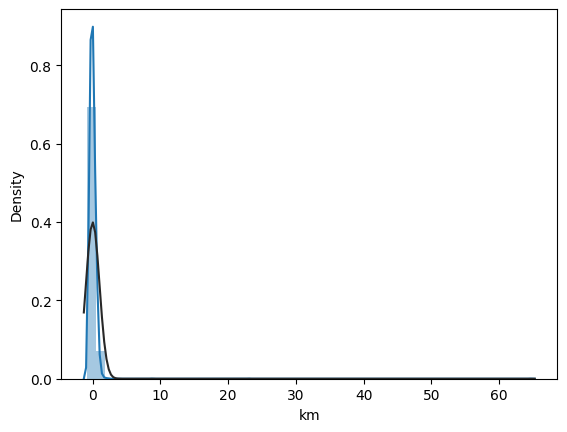

transmission -1.1001980259531239


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


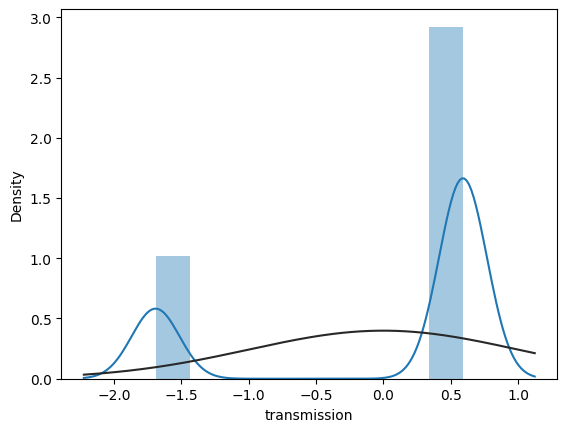

ownerNo 1.71745368665508


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


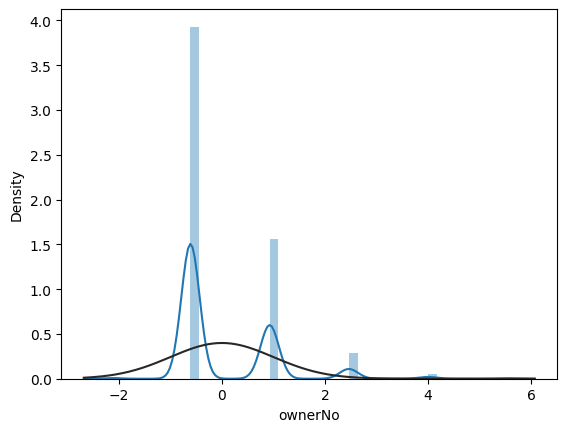

model 0.5243167825014506


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


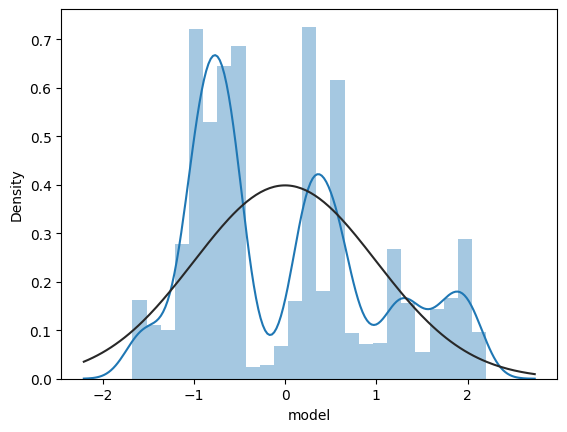

modelYear -0.9267208188635145


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


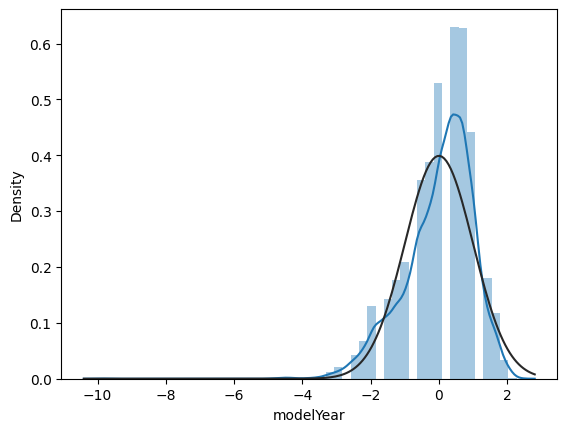

centralVariantId 0.06607882681074972


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


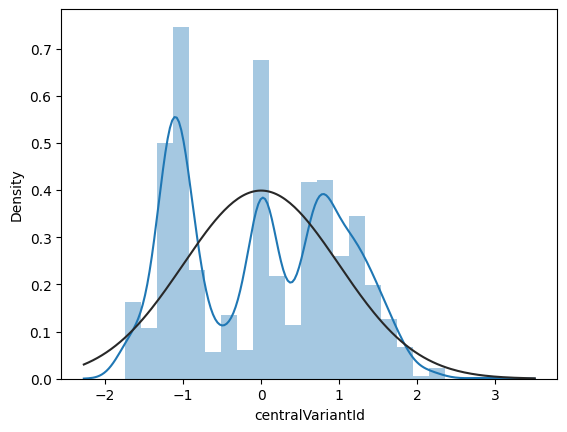

variantName 0.04090204658790261


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


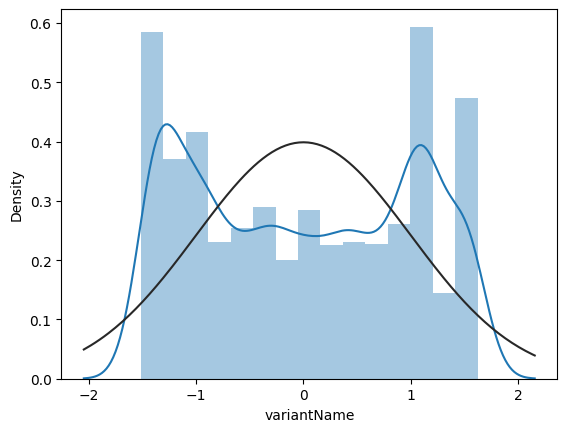

price 4.091779500767008


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


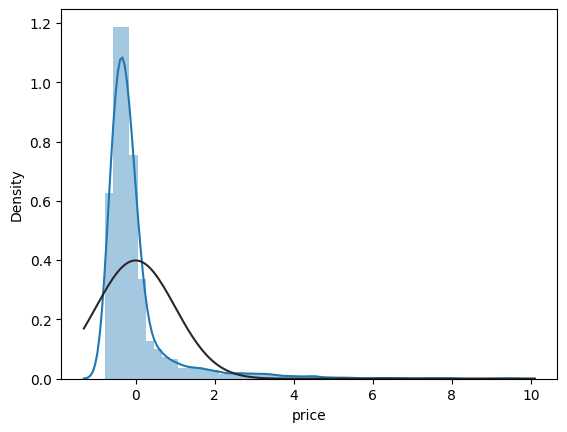

Insurance Validity -0.27112290812186496


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


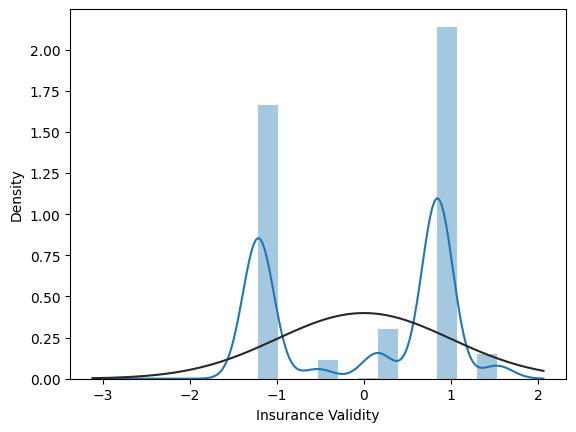

Fuel Type -0.562434062958525


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


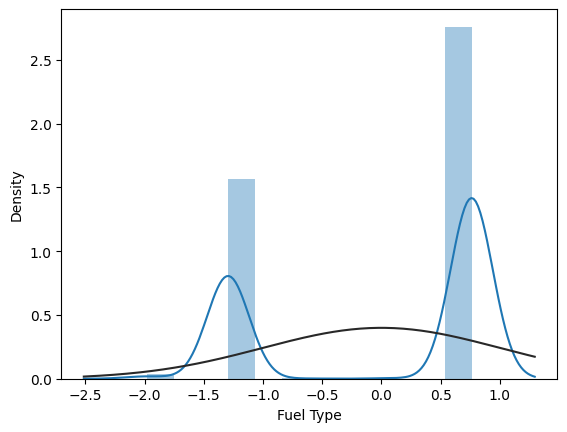

Transmission -1.1001980259531239


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


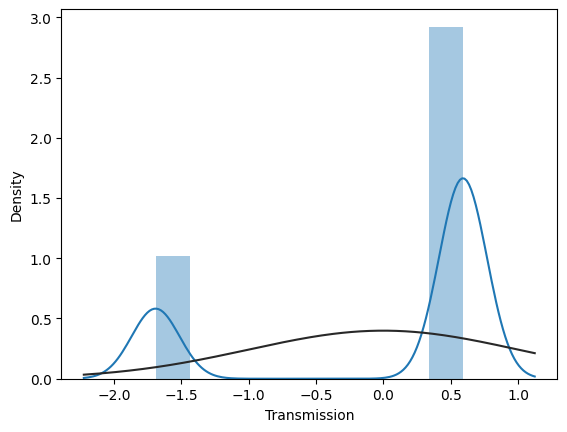

Features -6.920278051305665


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


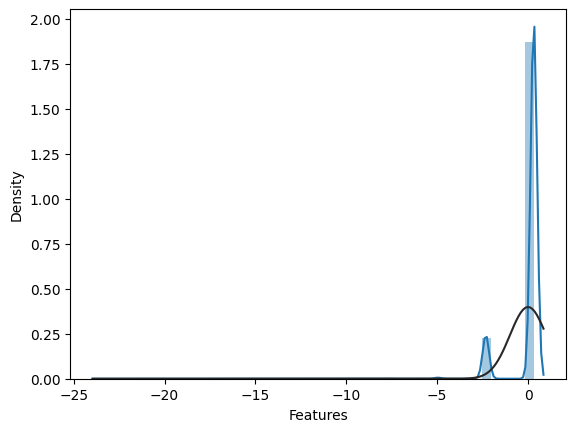

Mileage 6.554074431740092


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


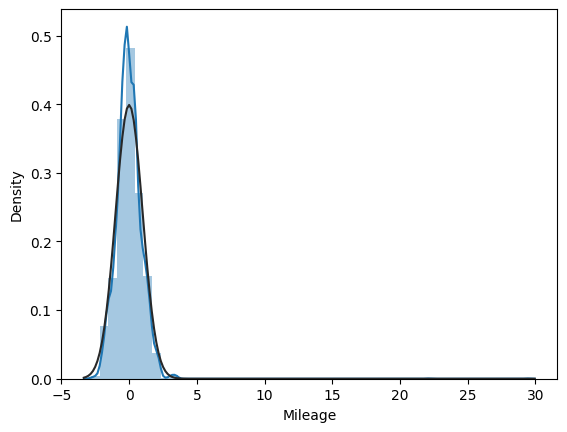

Torque 1.65108845837335


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


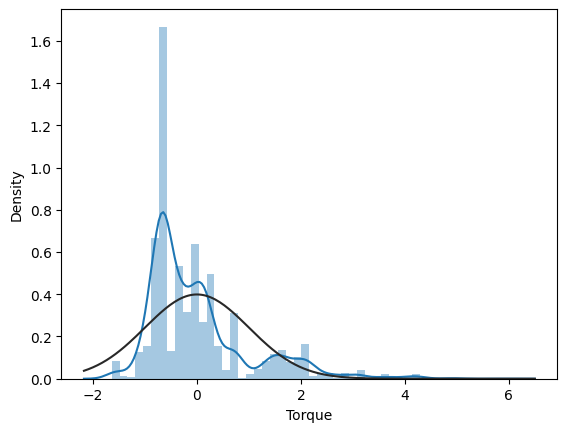

Color -0.7280644179705068


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


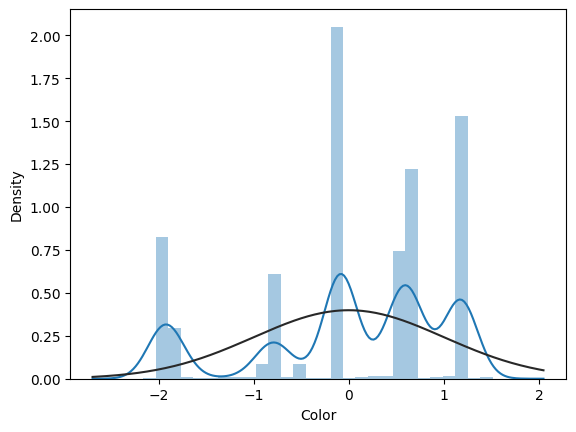

Engine Type -0.636443658458045


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


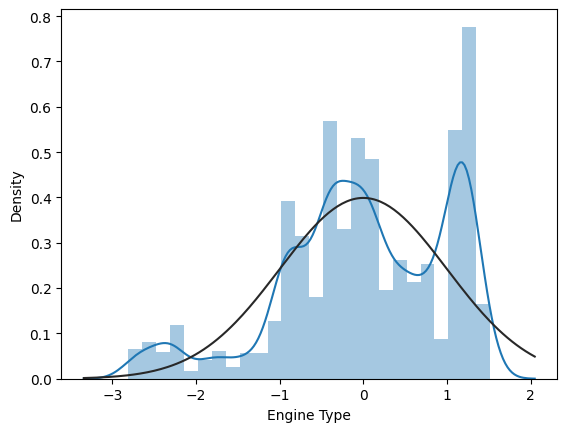

Displacement 1.6393988587268342


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


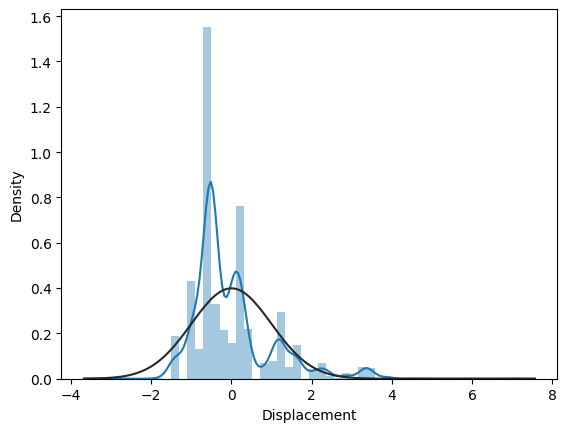

No of Cylinder 7.5021016249084225


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


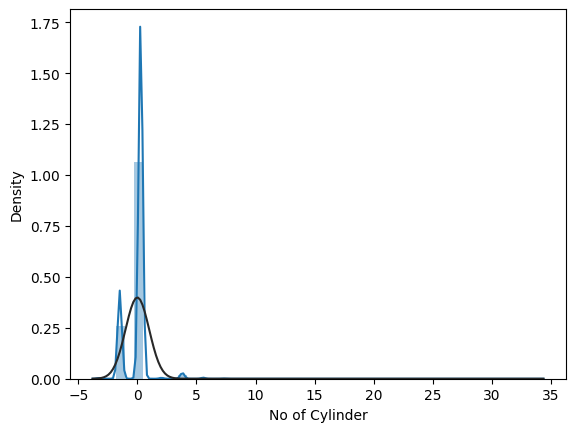

Values per Cylinder 59.77581987979215


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


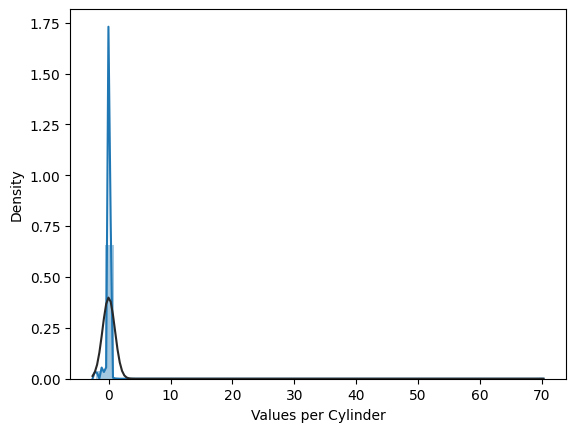

Value Configuration 1.4759174581049366


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


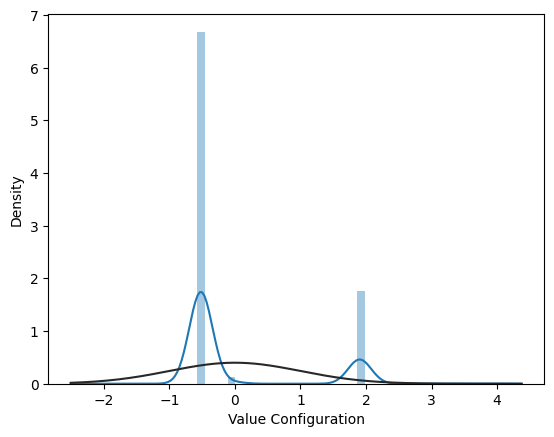

Fuel Suppy System -0.2983332479036733


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


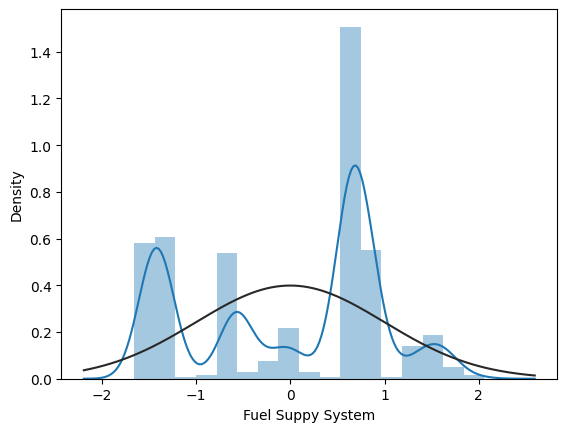

Compression Ratio 1.5505338085222644


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


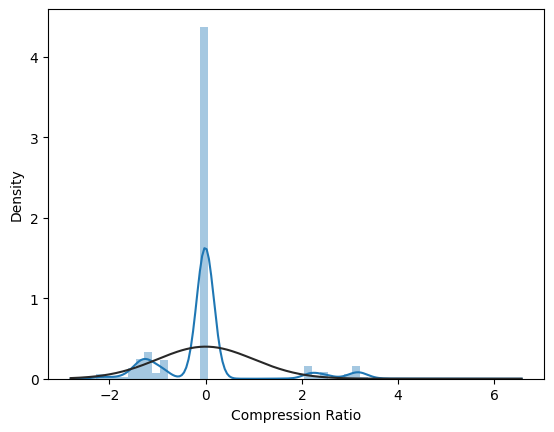

Turbo Charger 0.5189697989633144


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


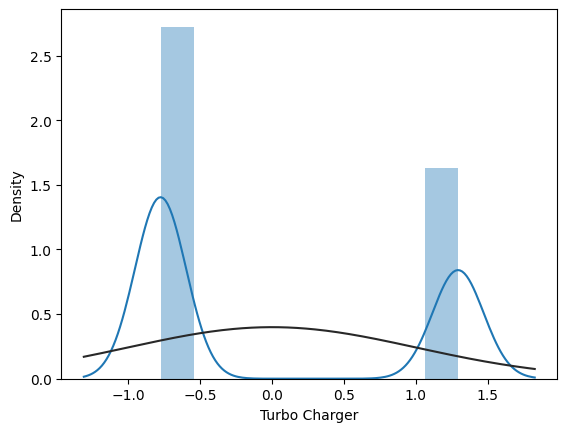

Super Charger 31.307726823726536


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


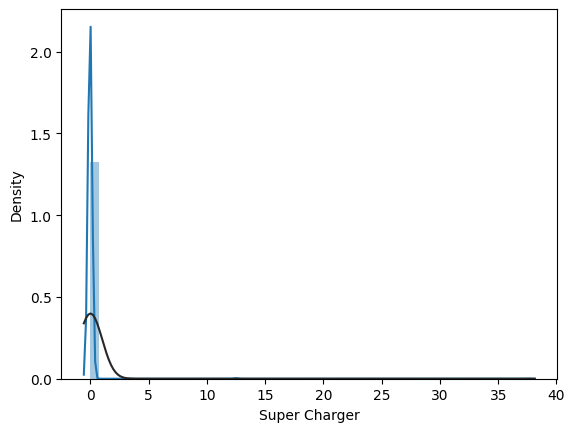

Length 0.3517744724455239


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


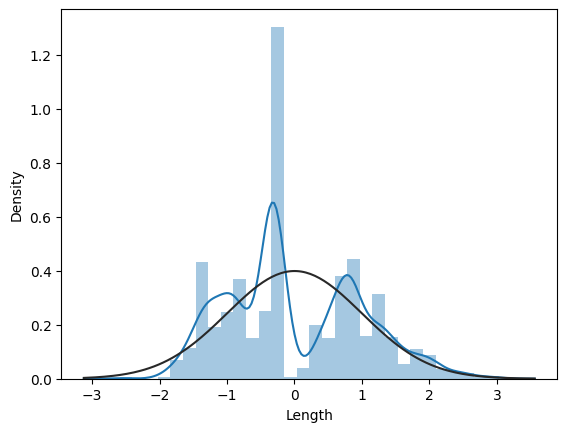

Width 1.0712002945929306


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


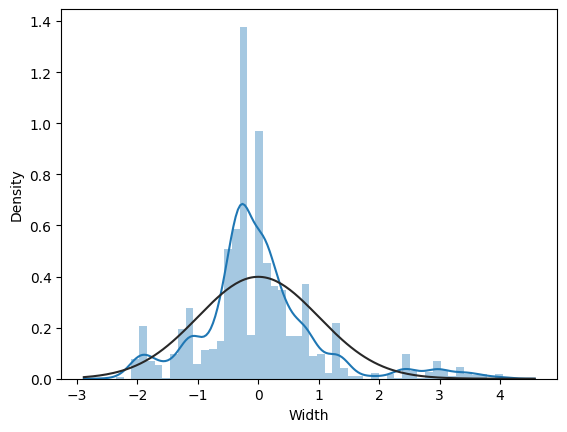

Height 1.322794347253129


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


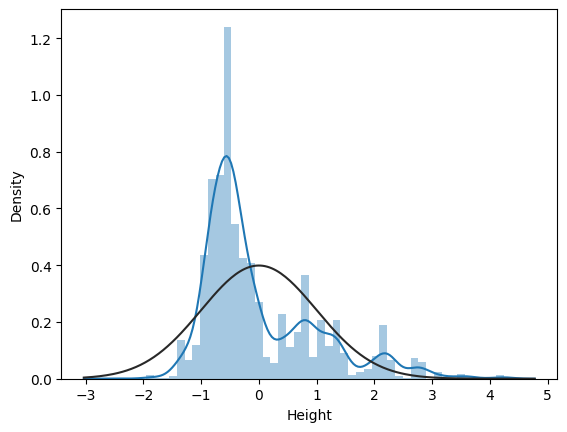

Wheel Base 1.07148679954411


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


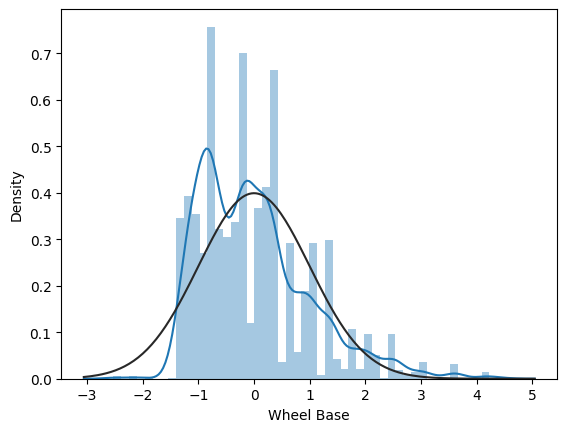

Front Tread -0.6956386439816871


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


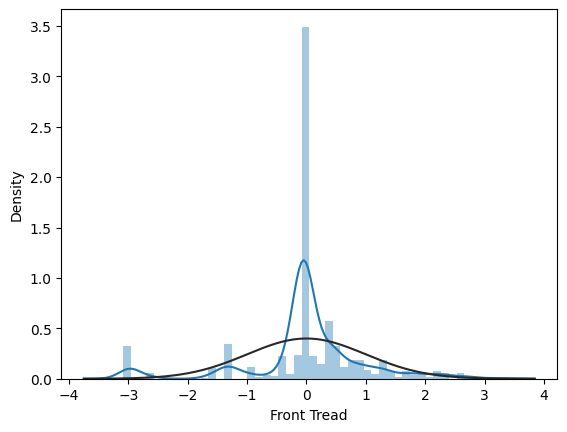

Rear Tread -0.6991762322210188


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


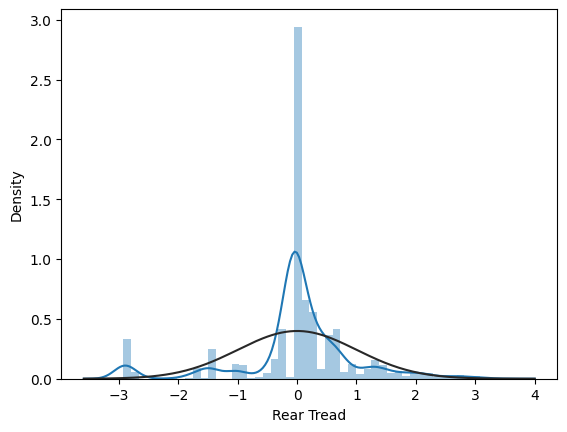

Kerb Weight 1.354831568886608


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


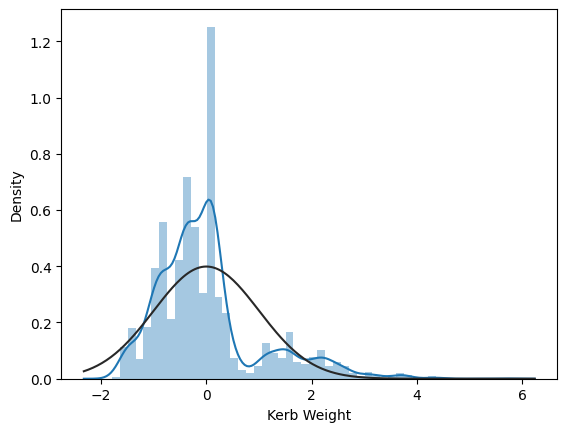

Gross Weight 1.694883562902337


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


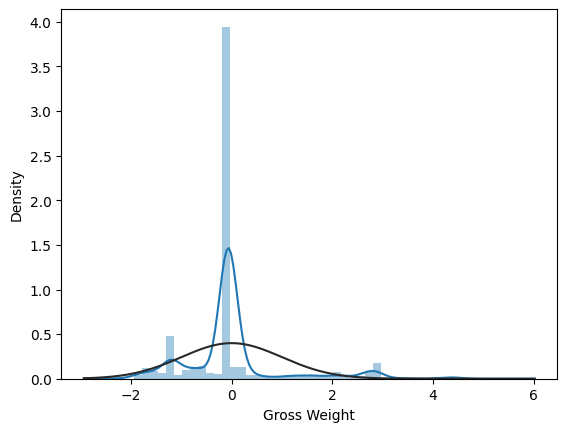

Drive Type -2.794562777163381


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


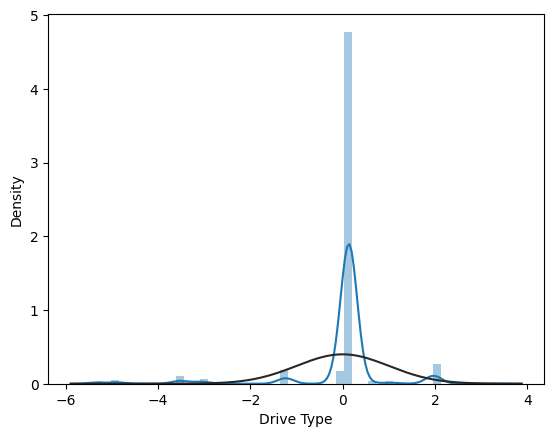

Seating Capacity 2.854855110118746


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


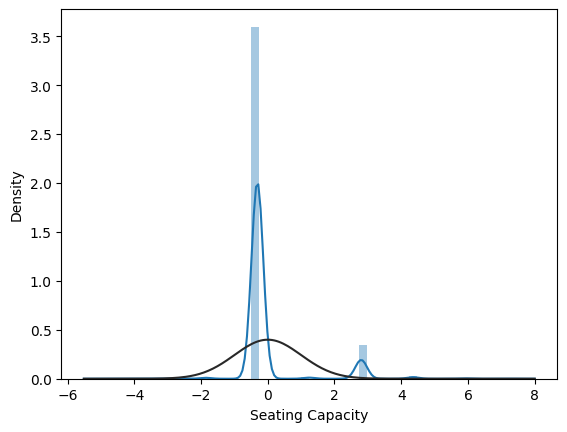

Steering Type -3.1517276105682606


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


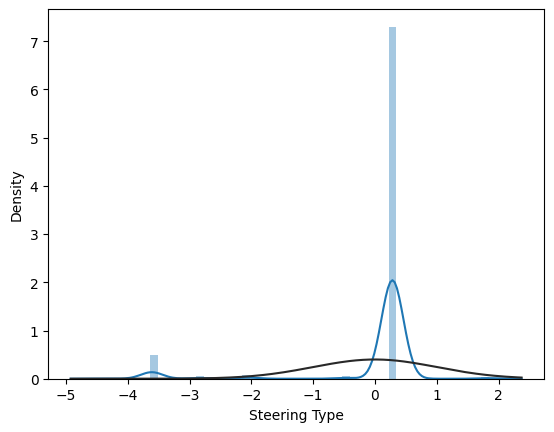

Turning Radius 3.8724622293869806


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


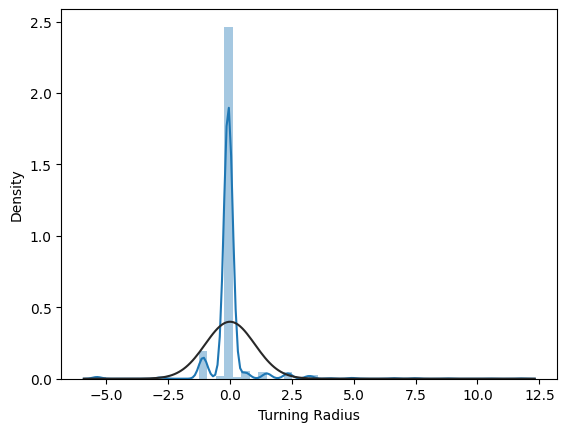

Front Brake Type 0.5865929639516247


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


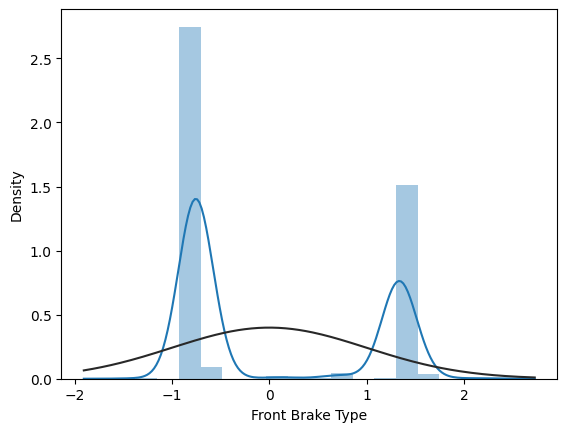

Rear Brake Type 3.140099072129767


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


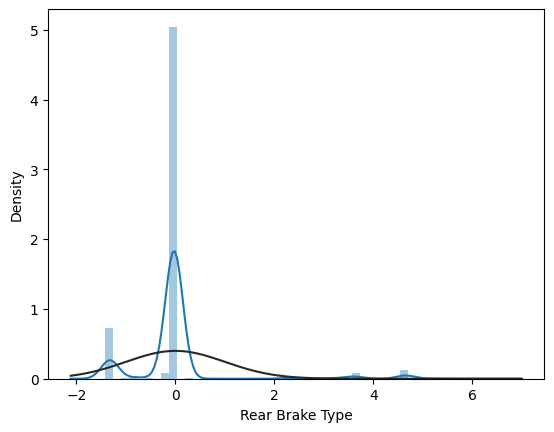

Top Speed 1.8360293446571452


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


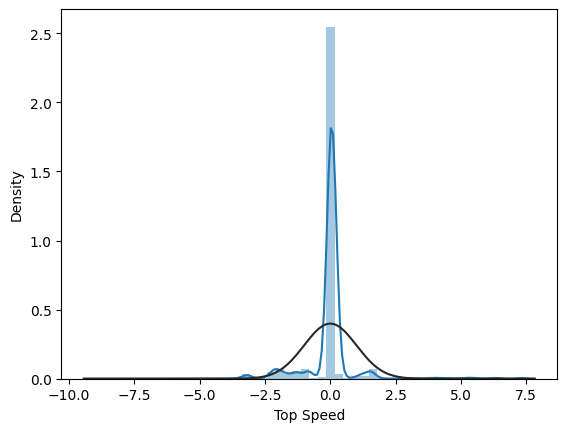

Acceleration 0.8390332476155695


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


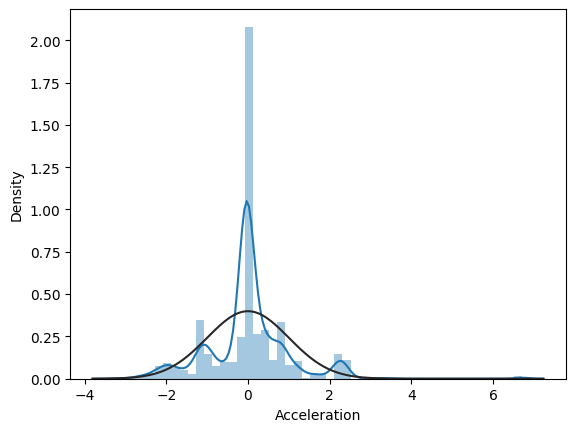

Tyre Type -1.1980710131716603


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


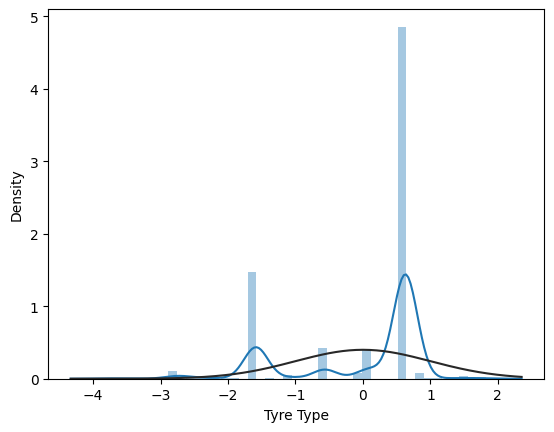

No Door Numbers -0.8044687782082868


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


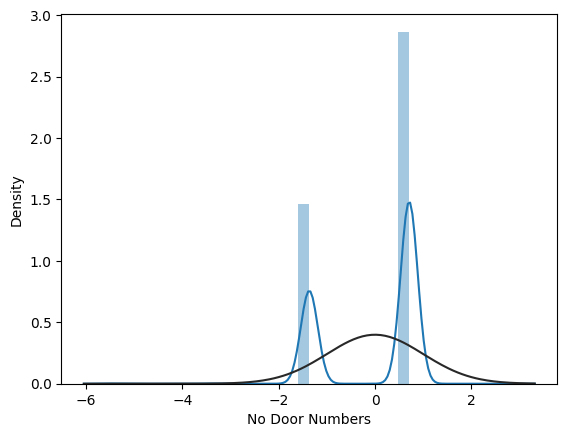

Cargo Volumn 75.09763217930124


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


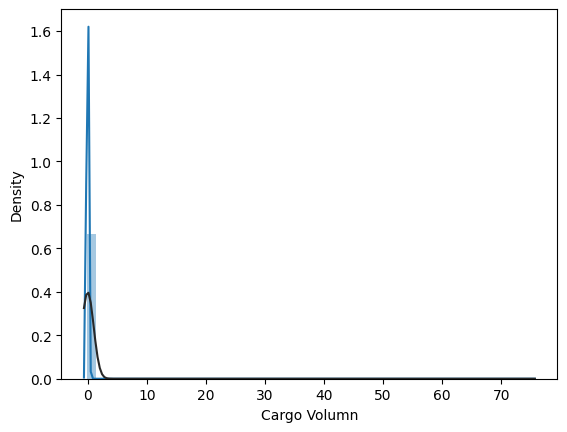

Wheel Size 0.021493629368988423


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


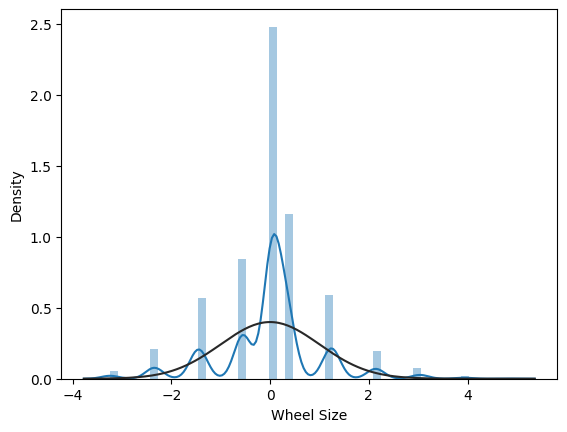

City 0.11038321581422529


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


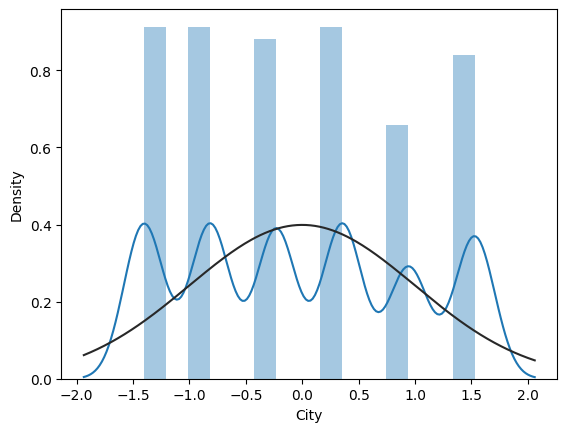

RPM_BHP -0.4777391627116383


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


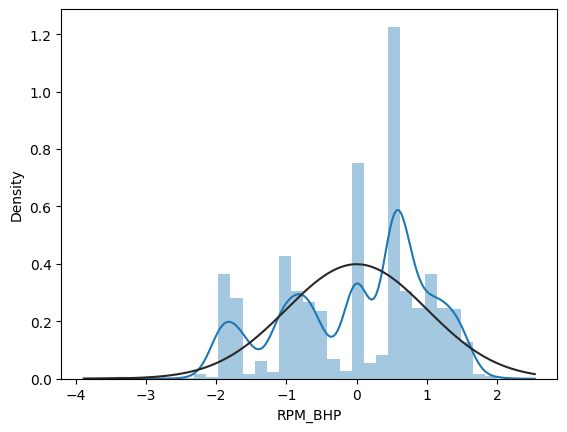

Power_RTO 14.369399399653819


C:\Users\Jacquline\AppData\Local\Temp\ipykernel_3512\3969841320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)


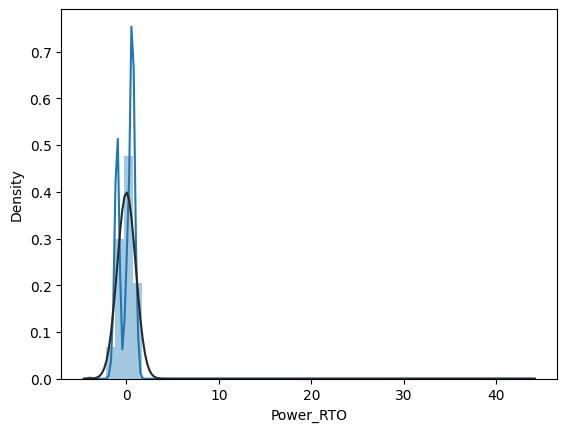

In [35]:
for i in df.columns:
  print(i, df[i].skew())
  sns.distplot(df[i],fit=norm)
  plt.show()

In [36]:
#here most of the columns has skewness

#so we can transform skewed col by boxcox lmbda method

methods = [0,0.5,-0.5,2,-2,-1] #lmbda value from this 5 we can go with which is nearer to 0
for j in df.columns:
  print(j)
  print("*******"*20)
  for i in methods:
    print(pd.DataFrame(stats.boxcox(df[j],lmbda=i)).skew())

bt
********************************************************************************************************************************************
0   -8.313467
dtype: float64
0   -1.57993
dtype: float64
0   -18.707853
dtype: float64
0   -0.326189
dtype: float64
0   -20.455478
dtype: float64
0   -20.382916
dtype: float64
km
********************************************************************************************************************************************
0   -1.167494
dtype: float64
0    7.642515
dtype: float64
0   -40.194622
dtype: float64
0    48.863882
dtype: float64
0   -49.969469
dtype: float64
0   -49.74054
dtype: float64
transmission
********************************************************************************************************************************************
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
ownerNo
*****************************************************

Kurtosis

In [37]:
from scipy.stats import kurtosis

In [39]:
 #by fisher method , value should be around 0
kurt_col = [] #kurtosis affected column
for i in df.columns:
    if kurtosis(df[i]) > 0.4 or kurtosis(df[i]) < -0.4:
        kurt_col.append(i)


In [40]:
kurt_col

['bt',
 'km',
 'transmission',
 'ownerNo',
 'model',
 'modelYear',
 'centralVariantId',
 'variantName',
 'price',
 'Insurance Validity',
 'Fuel Type',
 'Transmission',
 'Features',
 'Mileage',
 'Torque',
 'Color',
 'Displacement',
 'No of Cylinder',
 'Values per Cylinder',
 'Fuel Suppy System',
 'Compression Ratio',
 'Turbo Charger',
 'Super Charger',
 'Length',
 'Width',
 'Height',
 'Wheel Base',
 'Front Tread',
 'Rear Tread',
 'Kerb Weight',
 'Gross Weight',
 'Drive Type',
 'Seating Capacity',
 'Steering Type',
 'Turning Radius',
 'Front Brake Type',
 'Rear Brake Type',
 'Top Speed',
 'Acceleration',
 'No Door Numbers',
 'Cargo Volumn',
 'Wheel Size',
 'City',
 'RPM_BHP',
 'Power_RTO']

In [41]:
methods = [0, 0.5, -0.5, 2, -2, -1]

for j in kurt_col:
    print(f"Processing column: {j}")
    # Get the data for the column
    data = df[j]
    
    for i in methods:
        try:
            # Perform Box-Cox transformation
            transformed_data, _ = stats.boxcox(data + 1)  # Box-Cox requires positive values
            print(f"Method {i}: Transformation successful")
        except Exception as e:
            print(f"Method {i}: Transformation failed with error: {e}")

Processing column: bt
Method 0: Transformation failed with error: Data must be positive.
Method 0.5: Transformation failed with error: Data must be positive.
Method -0.5: Transformation failed with error: Data must be positive.
Method 2: Transformation failed with error: Data must be positive.
Method -2: Transformation failed with error: Data must be positive.
Method -1: Transformation failed with error: Data must be positive.
Processing column: km
Method 0: Transformation successful
Method 0.5: Transformation successful
Method -0.5: Transformation successful
Method 2: Transformation successful
Method -2: Transformation successful
Method -1: Transformation successful
Processing column: transmission
Method 0: Transformation failed with error: Data must be positive.
Method 0.5: Transformation failed with error: Data must be positive.
Method -0.5: Transformation failed with error: Data must be positive.
Method 2: Transformation failed with error: Data must be positive.
Method -2: Transfor

statistical testing

In [42]:
#correlation checking - corr value should be nearer to 1 or -1
#if its nearer to 1/-1 then there is some connectivity between those two columns

corr_matrix =df.corr()
corr_matrix

,bt,km,transmission,ownerNo,model,modelYear,centralVariantId,variantName,price,Insurance Validity,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,City,RPM_BHP,Power_RTO
bt,1.000000,0.055009,-0.231493,-0.007360,-0.047507,0.035088,0.017935,0.059244,0.317475,0.006934,...,0.019775,0.256135,-0.395365,0.151799,-0.641342,0.008672,0.354576,0.010626,-0.162085,-0.229595
km,0.055009,1.000000,0.036498,0.066008,0.049334,-0.155818,-0.107366,-0.012755,-0.018985,0.030459,...,0.002741,0.002077,-0.023746,0.045928,-0.033680,0.003716,-0.022094,-0.021015,-0.123290,-0.118551
transmission,-0.231493,0.036498,1.000000,0.034263,0.019956,-0.171766,-0.074601,0.104876,-0.484054,0.088328,...,-0.008557,-0.183247,0.363357,-0.071304,0.142227,-0.000460,-0.376787,0.098313,-0.006501,0.036300
ownerNo,-0.007360,0.066008,0.034263,1.000000,-0.012787,-0.303498,-0.184056,-0.020437,-0.106322,0.123109,...,0.007125,0.003168,0.031121,0.069705,-0.042271,0.012548,-0.101657,-0.064782,-0.050019,-0.041935
model,-0.047507,0.049334,0.019956,-0.012787,1.000000,0.071271,0.273499,-0.078031,-0.001910,0.035613,...,0.053791,-0.156348,0.115420,0.138181,0.090626,-0.017124,0.018076,-0.007036,-0.137035,-0.092476
modelYear,0.035088,-0.155818,-0.171766,-0.303498,0.071271,1.000000,0.565274,-0.040735,0.304287,-0.110436,...,-0.082520,-0.006709,-0.016361,-0.165614,0.148456,-0.039725,0.399798,-0.022008,0.095013,0.047758
centralVariantId,0.017935,-0.107366,-0.074601,-0.184056,0.273499,0.565274,1.000000,0.025852,0.174401,-0.036092,...,-0.070378,-0.014693,0.061607,-0.091251,0.105631,-0.019478,0.228055,-0.018110,0.028904,0.041124
variantName,0.059244,-0.012755,0.104876,-0.020437,-0.078031,-0.040735,0.025852,1.000000,-0.053367,-0.017436,...,-0.068005,-0.018184,0.094083,0.104348,-0.066580,-0.018747,-0.094036,0.059168,-0.039539,0.051241
price,0.317475,-0.018985,-0.484054,-0.106322,-0.001910,0.304287,0.174401,-0.053367,1.000000,-0.123227,...,0.108240,0.299658,-0.501700,-0.029185,-0.087764,0.003100,0.633949,-0.102279,-0.146028,-0.154825
Insurance Validity,0.006934,0.030459,0.088328,0.123109,0.035613,-0.110436,-0.036092,-0.017436,-0.123227,1.000000,...,0.004041,-0.030259,0.048695,0.037810,-0.019272,0.010706,-0.089422,0.050818,-0.074955,-0.047352


SAMPLE TESTING


In [43]:
def two_sample(d1,d2): #for two continous variable
  m =[0,0]
  for i in range(31):
    sample1 = d1.sample(frac=0.03)
    sample2 = d2.sample(frac=0.04)
    t_test, p_value = stats.ttest_ind(sample1,sample2)
    if p_value < 0.04:
      m[1]+=1
    else:
      m[0]+=1
    if m[0]>m[1]:
      return True
    elif m[0]<m[1]:
      return False

def chi_square(d1,d2): #for two categorical variable
  return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1]<0.075 else False

def annova(d1,d2): #assume d1 - continous, d2 - category (for 1cat and 1cont variable)
  group = df[d2].unique()

  data1 = {}
  for i in group:
    data1[i]=df[d1][df[d2]==i]


  f_value , p_value = stats.f_oneway(*[i for i in data1.values()])
  if p_value<0.075:
    return False
  else:
    return True


In [44]:
final = {}
for i in df.columns:
  final[i] = {}
  for j in df.columns:

    if i in cont and j in cont:
      result = two_sample(df[i],df[j])

    elif i in cat and j in cat:
      result = chi_square(df[i],df[j])

    elif i in cont and j in cat:
      result = annova(i,j)

    elif i in cat and j in cont:
      result = annova(j,i)
    if result :
      final[i][j]=1
    else:
      final[i][j]=0

In [45]:
final_df = pd.DataFrame(final)
final_df

,bt,km,transmission,ownerNo,model,modelYear,centralVariantId,variantName,price,Insurance Validity,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,City,RPM_BHP,Power_RTO
bt,1,0,1,1,0,1,0,0,0,0,...,1,0,0,1,1,1,1,1,0,0
km,0,1,0,0,1,0,1,1,1,0,...,0,1,1,0,0,1,0,0,1,1
transmission,1,0,1,1,1,1,0,0,0,1,...,1,0,0,1,1,1,1,1,1,0
ownerNo,1,0,1,1,1,1,0,1,0,1,...,1,1,0,0,1,1,1,1,0,0
model,0,1,1,1,1,0,1,1,1,0,...,0,1,1,0,0,1,0,1,1,1
modelYear,1,0,1,1,0,1,0,0,0,1,...,1,1,0,1,1,0,1,1,0,0
centralVariantId,0,1,0,0,1,0,1,1,1,0,...,0,1,1,0,0,1,0,1,1,1
variantName,0,1,0,1,1,0,1,1,1,0,...,0,1,1,0,0,1,0,0,1,1
price,0,1,0,0,1,0,1,1,1,0,...,0,1,1,0,0,1,0,0,1,1
Insurance Validity,0,0,1,1,0,1,0,0,0,1,...,0,0,0,1,0,1,1,1,0,0


heatmap

<Axes: >

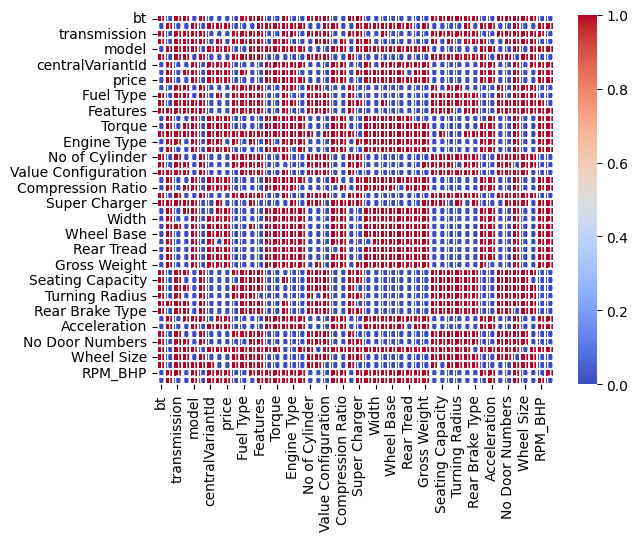

In [46]:
sns.heatmap(final_df,cmap ="coolwarm",linewidths=0.25,annot=True)

MACHINE TRAINING

In [70]:
x = df[['Features', 'Mileage']]  # Features (independent variables)
y = df['price']  

LinearRegression

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Step 3: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions (optional)
y_pred = model.predict(X_test)



In [54]:

# Display the model coefficients and predictions
print("Model Coefficients:", model.coef_)
print("Predictions on test set:", y_pred)

Model Coefficients: [ 0.1331069  -0.28807619]
Predictions on test set: [ 0.61393723  0.48751493 -0.19305846 ...  0.01905007  0.20587413
 -0.08911124]


DecisionTreeRegressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
#print("Model Coefficients:", model.coef_)
y_pred = model.predict(X_test)
print("Predictions on test set:", y_pred)

Predictions on test set: [-0.63806336 -0.71122363 -0.32092392 ... -0.03610669 -0.13696694
 -0.1148921 ]


RandomForestRegressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions on test set:", y_pred)

Predictions on test set: [-0.23553507 -0.21962238 -0.20835065 ... -0.3786517  -0.26543876
 -0.26693103]


GradientBoostingRegressor

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions on test set:", y_pred)

Predictions on test set: [-0.20156734  0.40265817 -0.17911419 ... -0.20156734 -0.19477652
 -0.19477652]


HERE WE ARE TAKING LINEAR REGRESSOR BECAUSE IT TRAIN MACHINE IN BETTER WAY